In [315]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime as dt

matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False 
pd.options.display.float_format = '{:.2f}'.format
# from tqdm import tqdm
plt.rcParams["figure.figsize"] = (10,10)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=17) 

from pandas.api.types import is_numeric_dtype, is_integer_dtype, is_float_dtype, is_bool_dtype
from pandas.api.types import is_object_dtype, is_string_dtype, is_categorical_dtype, is_datetime64_dtype

In [6]:
scale = pd.read_csv('total_scale.csv', engine ='python',encoding ='utf-8')

In [257]:
def check_spec(df, steel_kind):
    spec =df[df['강종']== steel_kind]
    pro = spec[spec['SCALE'] == 1].sort_values(by ='제품규격')
    non_pro = spec[spec['SCALE'] == 0].sort_values(by ='제품규격')
#     if len(steel_kind) >2:
#         kind =[]
#         steel[]
    pro_spec = pro['제품규격'].unique()
    non_pro_spec = non_pro['제품규격'].unique()
    common_lt =[]
    for i in pro_spec:
        if i in non_pro_spec:
            common_lt.append(i)
            
    pro_s =pro[pro['제품규격'].isin(common_lt)].groupby(['제품규격','SCALE']).size().to_frame(name ='count').reset_index()
    non_pro_s =non_pro[non_pro['제품규격'].isin(common_lt)].groupby(['제품규격','SCALE']).size().to_frame(name ='count').reset_index()
    
    pro_s['불량규격'] =non_pro_s['count'].lt(pro_s['count'])
    print('양품 개수 보다 불량 개수가 더 많은 제품 규격 \n {}'.format(pro_s[pro_s['불량규격']== True]['제품규격'].unique()))
    
    plt.figure(figsize = ( 20,15))
    sns.set_palette("deep")
    sns.barplot(data = pro_s, x = '제품규격', y='count', hue ='SCALE', alpha =0.5)
    sns.barplot(data = non_pro_s, x = '제품규격', y='count', hue ='SCALE', alpha =0.5)
#     plt.legend(loc='upper right')
    plt.xticks(rotation =90)
    plt.show()
            

양품 개수 보다 불량 개수가 더 많은 제품 규격 
 ['A283-C' 'AB/A' 'JS-SM400B' 'JS-SM490A' 'JS-SM490YA' 'JS-SS400' 'KR-A'
 'KS-SM400A' 'KS-SS400' 'NV-B']


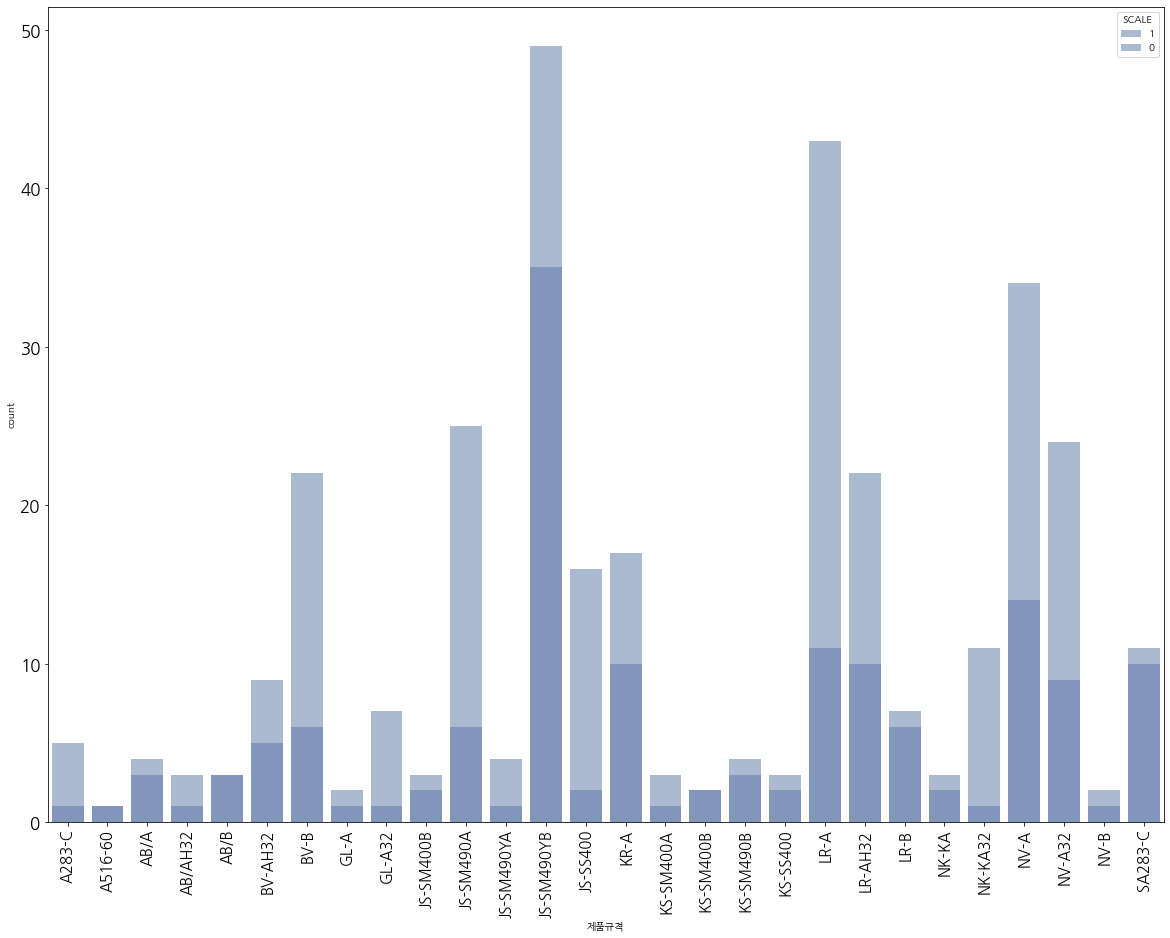

In [258]:
check_spec(scale, 'C0') 구조용, ,  용접 구조용, 용접구조용, 

In [ ]:
check_spec(scale, 'C0')

<ipython-input-291-b9033adcfa92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_c0['overok'] =sk_c0['제품규격'].isin(over_kind)


제품규격,JS-SM490A,KR-A,JS-SS400,AB/A,A283-C,JS-SM490YA,JS-SM400B,KS-SS400,KS-SM400A,NV-B
SCALE,,,,,,,,,,
0,6.00,10.00,2.00,3.00,1.00,1.00,2.00,2.00,1.00,1.00
1,25.00,17.00,16.00,4.00,5.00,4.00,3.00,3.00,3.00,2.00
All,31.00,27.00,18.00,7.00,6.00,5.00,5.00,5.00,4.00,3.00
ratio,0.81,0.63,0.89,0.57,0.83,0.80,0.60,0.60,0.75,0.67


제품규격,JS-SM490YB,LR-A,NV-A,NV-A32,LR-AH32,BV-B,SA283-C,BV-AH32,LR-B,NK-KA32,...,KS-SM400B,AB/AH32,GL-A,KR-AH32,JS-SM400A,A516-60,CCS-B,KR-B,A709-36,BV-A
SCALE,,,,,,,,,,,,,,,,,,,,,
0,49.00,43.00,34.00,24.00,22.00,22.00,11.00,9.00,7.00,11.00,...,2.00,3.00,2.00,3.00,0.00,1.00,0.00,0.00,1.00,1.00
1,35.00,11.00,14.00,9.00,10.00,6.00,10.00,5.00,6.00,1.00,...,2.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,0.00,0.00
All,84.00,54.00,48.00,33.00,32.00,28.00,21.00,14.00,13.00,12.00,...,4.00,4.00,3.00,3.00,2.00,2.00,1.00,1.00,1.00,1.00
ratio,0.42,0.20,0.29,0.27,0.31,0.21,0.48,0.36,0.46,0.08,...,0.50,0.25,0.33,0.00,1.00,0.50,1.00,1.00,0.00,0.00


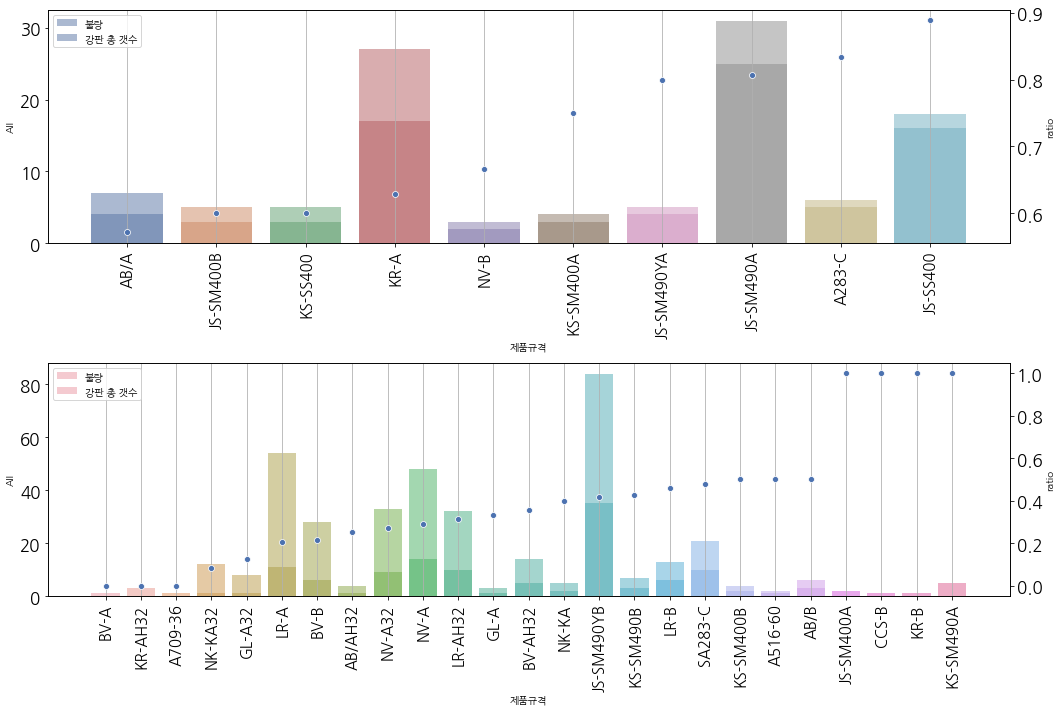

In [291]:
over_kind = ['A283-C', 'AB/A', 'JS-SM400B', 'JS-SM490A', 'JS-SM490YA', 'JS-SS400', 'KR-A',
 'KS-SM400A', 'KS-SS400', 'NV-B']
sk_c0['overok'] =sk_c0['제품규격'].isin(over_kind)
sk_c0_over = sk_c0[sk_c0['제품규격'].isin(over_kind)]
sk_c0_lack = sk_c0[sk_c0['overok']== False]

defec = sk_c0_over.groupby(['제품규격','SCALE']).size().reset_index(name='count').pivot_table(index ='제품규격',
                                                                                     columns ='SCALE', values ='count', aggfunc ='sum', margins = True).fillna(0)
lack = sk_c0_lack.groupby(['제품규격','SCALE']).size().reset_index(name='count').pivot_table(index ='제품규격',
                                                                                     columns ='SCALE', values ='count', aggfunc ='sum', margins = True).fillna(0)
defec['ratio'] = defec[1] /defec['All']
lack['ratio'] = lack[1] /lack['All']
display(defec.sort_values(by =['All','ratio'], ascending =False).iloc[1:,:].T)
display(lack.sort_values(by =['All','ratio'], ascending =False).iloc[1:,:].T)
de = defec.sort_values(by =['All','ratio'], ascending =False).iloc[1:, :].reset_index().sort_values(by ='ratio',ascending =True)
lk = lack.sort_values(by =['All','ratio'], ascending =False).iloc[1:, :].reset_index().sort_values(by ='ratio',ascending =True)
fig, ax = plt.subplots(2,1, figsize =(15,10))

sns.barplot(data = de ,x ='제품규격',y =1 ,label ='불량', alpha =0.5,ax =ax[0])
sns.barplot(data = de , x = '제품규격' ,y ='All', label ='강판 총 갯수', alpha =0.5 , ax= ax[0])
ax[0].legend(loc ='upper left')
ax[0].set_xticklabels (de['제품규격'],rotation = 90)
ax[0].grid(axis ='x')
ax2 = ax[0].twinx()
sns.scatterplot(data = de ,x ='제품규격', y ='ratio',ax = ax2)
ax[1]
sns.barplot(data = lk ,x ='제품규격',y =1 ,label ='불량', alpha =0.5,ax =ax[1])
sns.barplot(data = lk , x = '제품규격' ,y ='All', label ='강판 총 갯수', alpha =0.5 , ax= ax[1])
ax[1].legend(loc ='upper left')
ax[1].set_xticklabels (lk['제품규격'],rotation = 90)
ax[1].grid(axis ='x')
ax1 = ax[1].twinx()
sns.scatterplot(data = lk ,x ='제품규격', y ='ratio',ax = ax1)
fig.tight_layout()


In [308]:
for i in sk_c0_over['제품규격'].unique():
    check =sk_c0_over[sk_c0_over['제품규격']==i]
    print('제품 규격 {} 의 각 변수별 상관계수'.format(i))
    display(check.corr())
#     display(check.describe())

제품 규격 JS-SM490A 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,0.64,-0.94,-0.43,-0.67,-0.12,0.48,0.18,0.31,0.33,0.30,0.31,0.87,-0.42,-0.48,nan
두께,0.64,1.00,-0.63,-0.66,-0.25,-0.21,0.15,0.01,0.06,-0.05,0.03,0.06,0.78,-0.90,-0.21,nan
폭,-0.94,-0.63,1.00,0.29,0.66,0.11,-0.45,-0.05,-0.27,-0.33,-0.23,-0.27,-0.84,0.51,0.45,nan
길이,-0.43,-0.66,0.29,1.00,0.53,0.12,0.00,0.04,0.03,-0.11,0.01,0.03,-0.60,0.44,0.15,nan
중량,-0.67,-0.25,0.66,0.53,1.00,-0.07,-0.19,0.16,-0.05,-0.49,-0.07,-0.05,-0.61,0.12,0.28,nan
작업순번,-0.12,-0.21,0.11,0.12,-0.07,1.00,-0.12,0.02,-0.26,-0.03,-0.07,-0.26,-0.22,0.20,0.19,nan
가열대온도,0.48,0.15,-0.45,0.00,-0.19,-0.12,1.00,0.20,0.86,0.18,0.19,0.86,0.30,-0.01,-0.07,nan
가열대시간,0.18,0.01,-0.05,0.04,0.16,0.02,0.20,1.00,0.25,-0.36,0.50,0.25,0.17,0.09,-0.41,nan
균열대온도,0.31,0.06,-0.27,0.03,-0.05,-0.26,0.86,0.25,1.00,0.18,0.41,1.00,0.26,-0.01,-0.29,nan
균열대시간,0.33,-0.05,-0.33,-0.11,-0.49,-0.03,0.18,-0.36,0.18,1.00,0.32,0.18,0.26,0.08,-0.29,nan


제품 규격 JS-SM400B 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,nan,nan,nan,nan,-0.41,0.65,0.14,0.78,-0.26,0.49,0.78,0.94,nan,-0.66,nan
두께,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
폭,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
길이,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
중량,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
작업순번,-0.41,nan,nan,nan,nan,1.00,-0.29,0.25,-0.34,0.76,-0.34,-0.34,-0.52,nan,0.17,nan
가열대온도,0.65,nan,nan,nan,nan,-0.29,1.00,-0.47,0.92,0.30,0.98,0.92,0.47,nan,-0.91,nan
가열대시간,0.14,nan,nan,nan,nan,0.25,-0.47,1.00,-0.11,-0.22,-0.60,-0.11,0.07,nan,0.10,nan
균열대온도,0.78,nan,nan,nan,nan,-0.34,0.92,-0.11,1.00,0.15,0.85,1.00,0.57,nan,-0.98,nan
균열대시간,-0.26,nan,nan,nan,nan,0.76,0.30,-0.22,0.15,1.00,0.31,0.15,-0.48,nan,-0.34,nan


제품 규격 KS-SS400 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,0.41,-0.30,-0.85,-0.34,-0.17,0.54,0.66,0.79,-0.26,0.89,0.79,0.88,nan,-0.95,nan
두께,0.41,1.00,-0.27,-0.57,-0.75,-0.41,-0.14,0.94,-0.03,-0.24,0.42,-0.03,0.57,nan,-0.39,nan
폭,-0.30,-0.27,1.00,0.72,-0.32,0.24,0.14,-0.35,0.09,0.71,-0.33,0.09,-0.17,nan,0.11,nan
길이,-0.85,-0.57,0.72,1.00,0.16,0.20,-0.17,-0.75,-0.41,0.62,-0.75,-0.41,-0.70,nan,0.70,nan
중량,-0.34,-0.75,-0.32,0.16,1.00,0.53,-0.30,-0.74,-0.30,-0.42,-0.47,-0.30,-0.67,nan,0.51,nan
작업순번,-0.17,-0.41,0.24,0.20,0.53,1.00,-0.54,-0.50,-0.30,-0.44,-0.59,-0.30,-0.57,nan,0.36,nan
가열대온도,0.54,-0.14,0.14,-0.17,-0.30,-0.54,1.00,0.14,0.92,0.57,0.75,0.92,0.69,nan,-0.73,nan
가열대시간,0.66,0.94,-0.35,-0.75,-0.74,-0.50,0.14,1.00,0.28,-0.21,0.69,0.28,0.80,nan,-0.66,nan
균열대온도,0.79,-0.03,0.09,-0.41,-0.30,-0.30,0.92,0.28,1.00,0.31,0.83,1.00,0.79,nan,-0.90,nan
균열대시간,-0.26,-0.24,0.71,0.62,-0.42,-0.44,0.57,-0.21,0.31,1.00,0.04,0.31,0.10,nan,-0.05,nan


제품 규격 KR-A 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,0.29,-0.06,-0.35,0.05,-0.13,0.04,0.10,0.37,-0.36,-0.08,0.37,0.36,-0.46,0.15,nan
두께,0.29,1.00,-0.34,-0.35,0.40,0.01,-0.45,-0.01,-0.05,-0.61,-0.25,-0.05,0.77,-0.84,0.17,nan
폭,-0.06,-0.34,1.00,-0.16,-0.12,0.23,0.24,-0.05,0.23,0.31,-0.16,0.23,-0.64,0.08,0.33,nan
길이,-0.35,-0.35,-0.16,1.00,0.52,-0.25,0.43,0.30,0.14,0.08,0.47,0.14,-0.08,0.35,-0.59,nan
중량,0.05,0.40,-0.12,0.52,1.00,-0.14,0.09,0.26,0.23,-0.38,0.02,0.23,0.22,-0.47,-0.15,nan
작업순번,-0.13,0.01,0.23,-0.25,-0.14,1.00,-0.40,-0.25,-0.37,0.36,-0.15,-0.37,-0.16,-0.01,0.15,nan
가열대온도,0.04,-0.45,0.24,0.43,0.09,-0.40,1.00,0.18,0.83,0.06,0.39,0.83,-0.23,0.34,-0.23,nan
가열대시간,0.10,-0.01,-0.05,0.30,0.26,-0.25,0.18,1.00,0.08,-0.01,0.56,0.08,0.16,-0.04,-0.56,nan
균열대온도,0.37,-0.05,0.23,0.14,0.23,-0.37,0.83,0.08,1.00,-0.37,0.03,1.00,0.05,-0.12,0.12,nan
균열대시간,-0.36,-0.61,0.31,0.08,-0.38,0.36,0.06,-0.01,-0.37,1.00,0.42,-0.37,-0.56,0.63,-0.40,nan


제품 규격 KS-SM400A 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,-0.33,0.34,0.37,0.35,nan,-0.34,0.11,0.31,-0.99,-0.53,0.31,0.78,0.33,0.44,nan
두께,-0.33,1.00,-1.00,-0.96,-0.99,nan,-0.77,0.50,-0.92,0.34,0.22,-0.92,0.02,-1.00,0.08,nan
폭,0.34,-1.00,1.00,0.96,0.99,nan,0.76,-0.48,0.93,-0.35,-0.21,0.93,0.00,1.00,-0.10,nan
길이,0.37,-0.96,0.96,1.00,0.99,nan,0.68,-0.23,0.99,-0.33,-0.00,0.99,0.18,0.96,-0.29,nan
중량,0.35,-0.99,0.99,0.99,1.00,nan,0.73,-0.38,0.96,-0.34,-0.13,0.96,0.07,0.99,-0.18,nan
작업순번,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
가열대온도,-0.34,-0.77,0.76,0.68,0.73,nan,1.00,-0.64,0.67,0.31,0.06,0.67,-0.59,0.77,-0.29,nan
가열대시간,0.11,0.50,-0.48,-0.23,-0.38,nan,-0.64,1.00,-0.14,0.03,0.66,-0.14,0.70,-0.49,-0.52,nan
균열대온도,0.31,-0.92,0.93,0.99,0.96,nan,0.67,-0.14,1.00,-0.26,0.12,1.00,0.20,0.93,-0.41,nan
균열대시간,-0.99,0.34,-0.35,-0.33,-0.34,nan,0.31,0.03,-0.26,1.00,0.66,-0.26,-0.68,-0.34,-0.57,nan


제품 규격 JS-SS400 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,0.29,-0.37,-0.44,-0.20,0.32,0.30,0.28,0.32,0.23,0.45,0.32,0.61,-0.17,-0.53,nan
두께,0.29,1.00,-0.22,-0.82,-0.51,0.35,0.22,-0.29,0.22,0.13,0.11,0.22,0.64,-0.70,-0.19,nan
폭,-0.37,-0.22,1.00,0.24,-0.06,-0.48,-0.06,-0.29,0.07,-0.29,-0.56,0.07,-0.62,0.19,0.75,nan
길이,-0.44,-0.82,0.24,1.00,0.60,-0.37,-0.08,0.20,-0.15,-0.13,-0.03,-0.15,-0.67,0.74,0.11,nan
중량,-0.20,-0.51,-0.06,0.60,1.00,-0.00,-0.15,0.03,0.01,0.22,0.02,0.01,-0.17,0.30,-0.08,nan
작업순번,0.32,0.35,-0.48,-0.37,-0.00,1.00,-0.10,0.21,0.05,0.54,0.31,0.05,0.49,-0.21,-0.44,nan
가열대온도,0.30,0.22,-0.06,-0.08,-0.15,-0.10,1.00,-0.30,0.87,-0.27,0.09,0.87,0.39,0.02,-0.26,nan
가열대시간,0.28,-0.29,-0.29,0.20,0.03,0.21,-0.30,1.00,-0.32,0.54,0.77,-0.32,0.05,0.46,-0.58,nan
균열대온도,0.32,0.22,0.07,-0.15,0.01,0.05,0.87,-0.32,1.00,-0.06,0.07,1.00,0.46,-0.04,-0.25,nan
균열대시간,0.23,0.13,-0.29,-0.13,0.22,0.54,-0.27,0.54,-0.06,1.00,0.63,-0.06,0.29,0.10,-0.57,nan


제품 규격 JS-SM490YA 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,nan,nan,nan,nan,0.41,0.57,-0.67,0.63,0.05,0.48,0.63,0.97,nan,0.00,nan
두께,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
폭,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
길이,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
중량,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
작업순번,0.41,nan,nan,nan,nan,1.00,0.79,-0.09,0.74,-0.89,0.01,0.74,0.40,nan,0.00,nan
가열대온도,0.57,nan,nan,nan,nan,0.79,1.00,0.13,0.99,-0.56,0.53,0.99,0.49,nan,-0.45,nan
가열대시간,-0.67,nan,nan,nan,nan,-0.09,0.13,1.00,0.07,-0.20,0.09,0.07,-0.73,nan,-0.54,nan
균열대온도,0.63,nan,nan,nan,nan,0.74,0.99,0.07,1.00,-0.48,0.64,1.00,0.52,nan,-0.52,nan
균열대시간,0.05,nan,nan,nan,nan,-0.89,-0.56,-0.20,-0.48,1.00,0.19,-0.48,0.06,nan,0.04,nan


제품 규격 NV-B 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,0.50,-0.50,0.74,-0.32,-1.00,-1.00,-0.99,-0.55,0.56,0.44,-0.55,0.46,-0.87,-0.65,nan
두께,0.50,1.00,-1.00,-0.21,-0.98,-0.50,-0.58,-0.37,-1.00,1.00,1.00,-1.00,1.00,-0.87,-0.98,nan
폭,-0.50,-1.00,1.00,0.20,0.98,0.50,0.58,0.38,1.00,-1.00,-1.00,1.00,-1.00,0.87,0.98,nan
길이,0.74,-0.21,0.20,1.00,0.40,-0.74,-0.68,-0.83,0.15,-0.14,-0.27,0.15,-0.25,-0.31,0.02,nan
중량,-0.32,-0.98,0.98,0.40,1.00,0.32,0.41,0.18,0.97,-0.96,-0.99,0.97,-0.99,0.75,0.93,nan
작업순번,-1.00,-0.50,0.50,-0.74,0.32,1.00,1.00,0.99,0.55,-0.56,-0.44,0.55,-0.46,0.87,0.65,nan
가열대온도,-1.00,-0.58,0.58,-0.68,0.41,1.00,1.00,0.97,0.62,-0.63,-0.52,0.62,-0.54,0.91,0.72,nan
가열대시간,-0.99,-0.37,0.38,-0.83,0.18,0.99,0.97,1.00,0.43,-0.44,-0.31,0.43,-0.34,0.79,0.54,nan
균열대온도,-0.55,-1.00,1.00,0.15,0.97,0.55,0.62,0.43,1.00,-1.00,-0.99,1.00,-1.00,0.89,0.99,nan
균열대시간,0.56,1.00,-1.00,-0.14,-0.96,-0.56,-0.63,-0.44,-1.00,1.00,0.99,-1.00,0.99,-0.90,-0.99,nan


제품 규격 AB/A 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,0.22,0.65,-0.86,-0.26,nan,0.30,-0.81,0.79,-0.69,-0.99,0.79,-0.07,-0.53,0.96,nan
두께,0.22,1.00,-0.38,-0.20,0.60,nan,-0.78,-0.05,-0.08,-0.39,-0.08,-0.08,0.87,-0.76,0.04,nan
폭,0.65,-0.38,1.00,-0.48,-0.17,nan,0.77,-0.46,0.83,-0.48,-0.69,0.83,-0.60,0.18,0.77,nan
길이,-0.86,-0.20,-0.48,1.00,0.21,nan,-0.32,0.74,-0.79,0.56,0.86,-0.79,0.04,0.34,-0.88,nan
중량,-0.26,0.60,-0.17,0.21,1.00,nan,-0.46,0.45,-0.07,-0.17,0.37,-0.07,0.52,-0.02,-0.27,nan
작업순번,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
가열대온도,0.30,-0.78,0.77,-0.32,-0.46,nan,1.00,-0.24,0.67,-0.14,-0.39,0.67,-0.83,0.62,0.52,nan
가열대시간,-0.81,-0.05,-0.46,0.74,0.45,nan,-0.24,1.00,-0.47,0.14,0.83,-0.47,0.33,0.47,-0.73,nan
균열대온도,0.79,-0.08,0.83,-0.79,-0.07,nan,0.67,-0.47,1.00,-0.73,-0.79,1.00,-0.28,0.04,0.92,nan
균열대시간,-0.69,-0.39,-0.48,0.56,-0.17,nan,-0.14,0.14,-0.73,1.00,0.63,-0.73,-0.35,0.37,-0.70,nan


제품 규격 A283-C 의 각 변수별 상관계수


,SCALE,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수,작업시간,overok
SCALE,1.00,0.69,0.56,-0.96,0.34,-0.45,0.28,-0.25,0.37,-0.89,-0.24,0.37,0.68,-0.88,0.45,nan
두께,0.69,1.00,-0.20,-0.50,0.80,-0.05,0.55,0.18,0.54,-0.78,0.12,0.54,0.97,-0.95,0.05,nan
폭,0.56,-0.20,1.00,-0.73,-0.41,-0.55,-0.22,-0.53,-0.07,-0.31,-0.36,-0.07,-0.17,-0.10,0.46,nan
길이,-0.96,-0.50,-0.73,1.00,-0.12,0.43,-0.22,0.47,-0.29,0.86,0.34,-0.29,-0.52,0.73,-0.54,nan
중량,0.34,0.80,-0.41,-0.12,1.00,0.09,0.59,0.40,0.64,-0.43,0.67,0.64,0.80,-0.68,-0.55,nan
작업순번,-0.45,-0.05,-0.55,0.43,0.09,1.00,0.68,-0.29,0.52,0.13,0.34,0.52,0.14,0.22,-0.33,nan
가열대온도,0.28,0.55,-0.22,-0.22,0.59,0.68,1.00,-0.32,0.96,-0.50,0.47,0.96,0.73,-0.48,-0.28,nan
가열대시간,-0.25,0.18,-0.53,0.47,0.40,-0.29,-0.32,1.00,-0.23,0.42,0.25,-0.23,-0.01,-0.02,-0.34,nan
균열대온도,0.37,0.54,-0.07,-0.29,0.64,0.52,0.96,-0.23,1.00,-0.47,0.56,1.00,0.71,-0.51,-0.35,nan
균열대시간,-0.89,-0.78,-0.31,0.86,-0.43,0.13,-0.50,0.42,-0.47,1.00,0.16,-0.47,-0.83,0.89,-0.35,nan


In [304]:
scale[scale['제품규격']=='JS-SM400B']

,강판번호,작업날짜,SCALE,제품규격,강종,두께,폭,길이,중량,호기,...,균열대온도,균열대시간,가열로시간,추출온도,압연온도,HSB적용여부,Descaling횟수,WORK_GR,작업날,작업시간
131,PB562905,2008-08-01:07:72:46,1,JS-SM400B,C0,18.10,2520,42675,61120,3호기,...,1166,63,319,1166,1012,적용,10,3조,2008-08-01 07:00:00,7
245,PB563017,2008-08-01:12:21:31,0,JS-SM400B,C0,18.10,2520,42675,61120,2호기,...,1146,52,271,1146,980,적용,10,1조,2008-08-01 12:00:00,12
578,PB563353,2008-08-02:08:80:38,0,JS-SM400B,C0,18.10,2520,42675,61120,2호기,...,1160,76,342,1160,958,적용,10,3조,2008-08-02 08:00:00,8
580,PB563355,2008-08-02:08:81:00,1,JS-SM400B,C0,18.10,2520,42675,61120,1호기,...,1165,42,342,1165,1031,적용,10,3조,2008-08-02 08:00:00,8
583,PB563354,2008-08-02:08:81:50,1,JS-SM400B,C0,18.10,2520,42675,61120,3호기,...,1163,68,342,1163,1027,적용,10,3조,2008-08-02 08:00:00,8


In [293]:
sk_c0 =scale[scale['강종']=='C0']
sk_t5 =scale[scale['강종']=='T5']
sk_t7 =scale[scale['강종']=='T7']
sk_t8 =scale[scale['강종']=='T8']

In [325]:
def sk_analysis(df):
    df =df.iloc[: , 2:].reset_index(drop=True)
    pro =df[df['SCALE']==1]
    non_pro =df[df['SCALE']==0]
    fig, ax = plt.subplots(nrows =7  , ncols =3 ,figsize =(30,40))
    n = 0
    m = 0
    for i in pro.columns:
        
        if is_object_dtype(pro[i]) == True:
            
            
            pro1 =pro[i].value_counts().to_frame(name ='count').reset_index()
            
            pro1.rename(columns ={'index' : i}, inplace =True)
            non_pro1 =non_pro[i].value_counts().to_frame(name ='count').reset_index()
            non_pro1.rename(columns ={'index' : i}, inplace = True)
            v_min =df[i].min()
            v_max =df[i].max()
            if i=='제품규격':
                pro1 = pro1.sort_values(by ='count',ascending =True)
                non_pro1 = non_pro1.sort_values(by ='count',ascending =True)
            
            ax[n,m].set_title('{} : {}'.format(df['강종'].unique(),i),fontsize =18)
            ax[n,m].bar(pro1[i],pro1['count'],color ='red',  label =' 불량',alpha =0.5)
            ax[n,m].bar(non_pro1[i], non_pro1['count'],color ='blue', label='양품',alpha =0.5)
            
            ax[n,m].set_xticklabels(non_pro1[i],fontsize= 17)
            ax[n,m].set_xlim(v_min, v_max)
            if i =='제품규격':
                ax[n,m].set_xticklabels(pro1[i],rotation= 90, fontsize =17)
            ax[n,m].legend(loc ='upper right')
            
            m+=1
            if m == 3:
                n+=1
                m =0
                if n == 8:
                    break
        elif is_object_dtype(pro[i]) == False:

            v_min =df[i].min()
            v_max =df[i].max()
            
            ax[n,m].set_title('{} : {}'.format(df['강종'].unique(),i),fontsize =18)
            ax[n,m].hist(pro[i],color ='red',  label ='불량',alpha =0.5)
            ax[n,m].hist(non_pro[i], color ='blue', label = '양품',alpha =0.5)
            
#             ax[n,m].set_xticklabels(non_pro[i],fontsize= 17)
#             ax[n,m].set_xlim(v_min, v_max)
            ax[n,m].legend(loc ='upper right')
            
            m+=1

            if m == 3:
                n+=1
                m =0
                if n == 8:
                    break
    fig.tight_layout()

In [350]:
def check(df):
    for i in over_kind:
        a= df[df['제품규격']==i]
        sk_analysis(a)
    


<ipython-input-325-4b3d9f4ba562>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  ax[n,m].set_xlim(v_min, v_max)


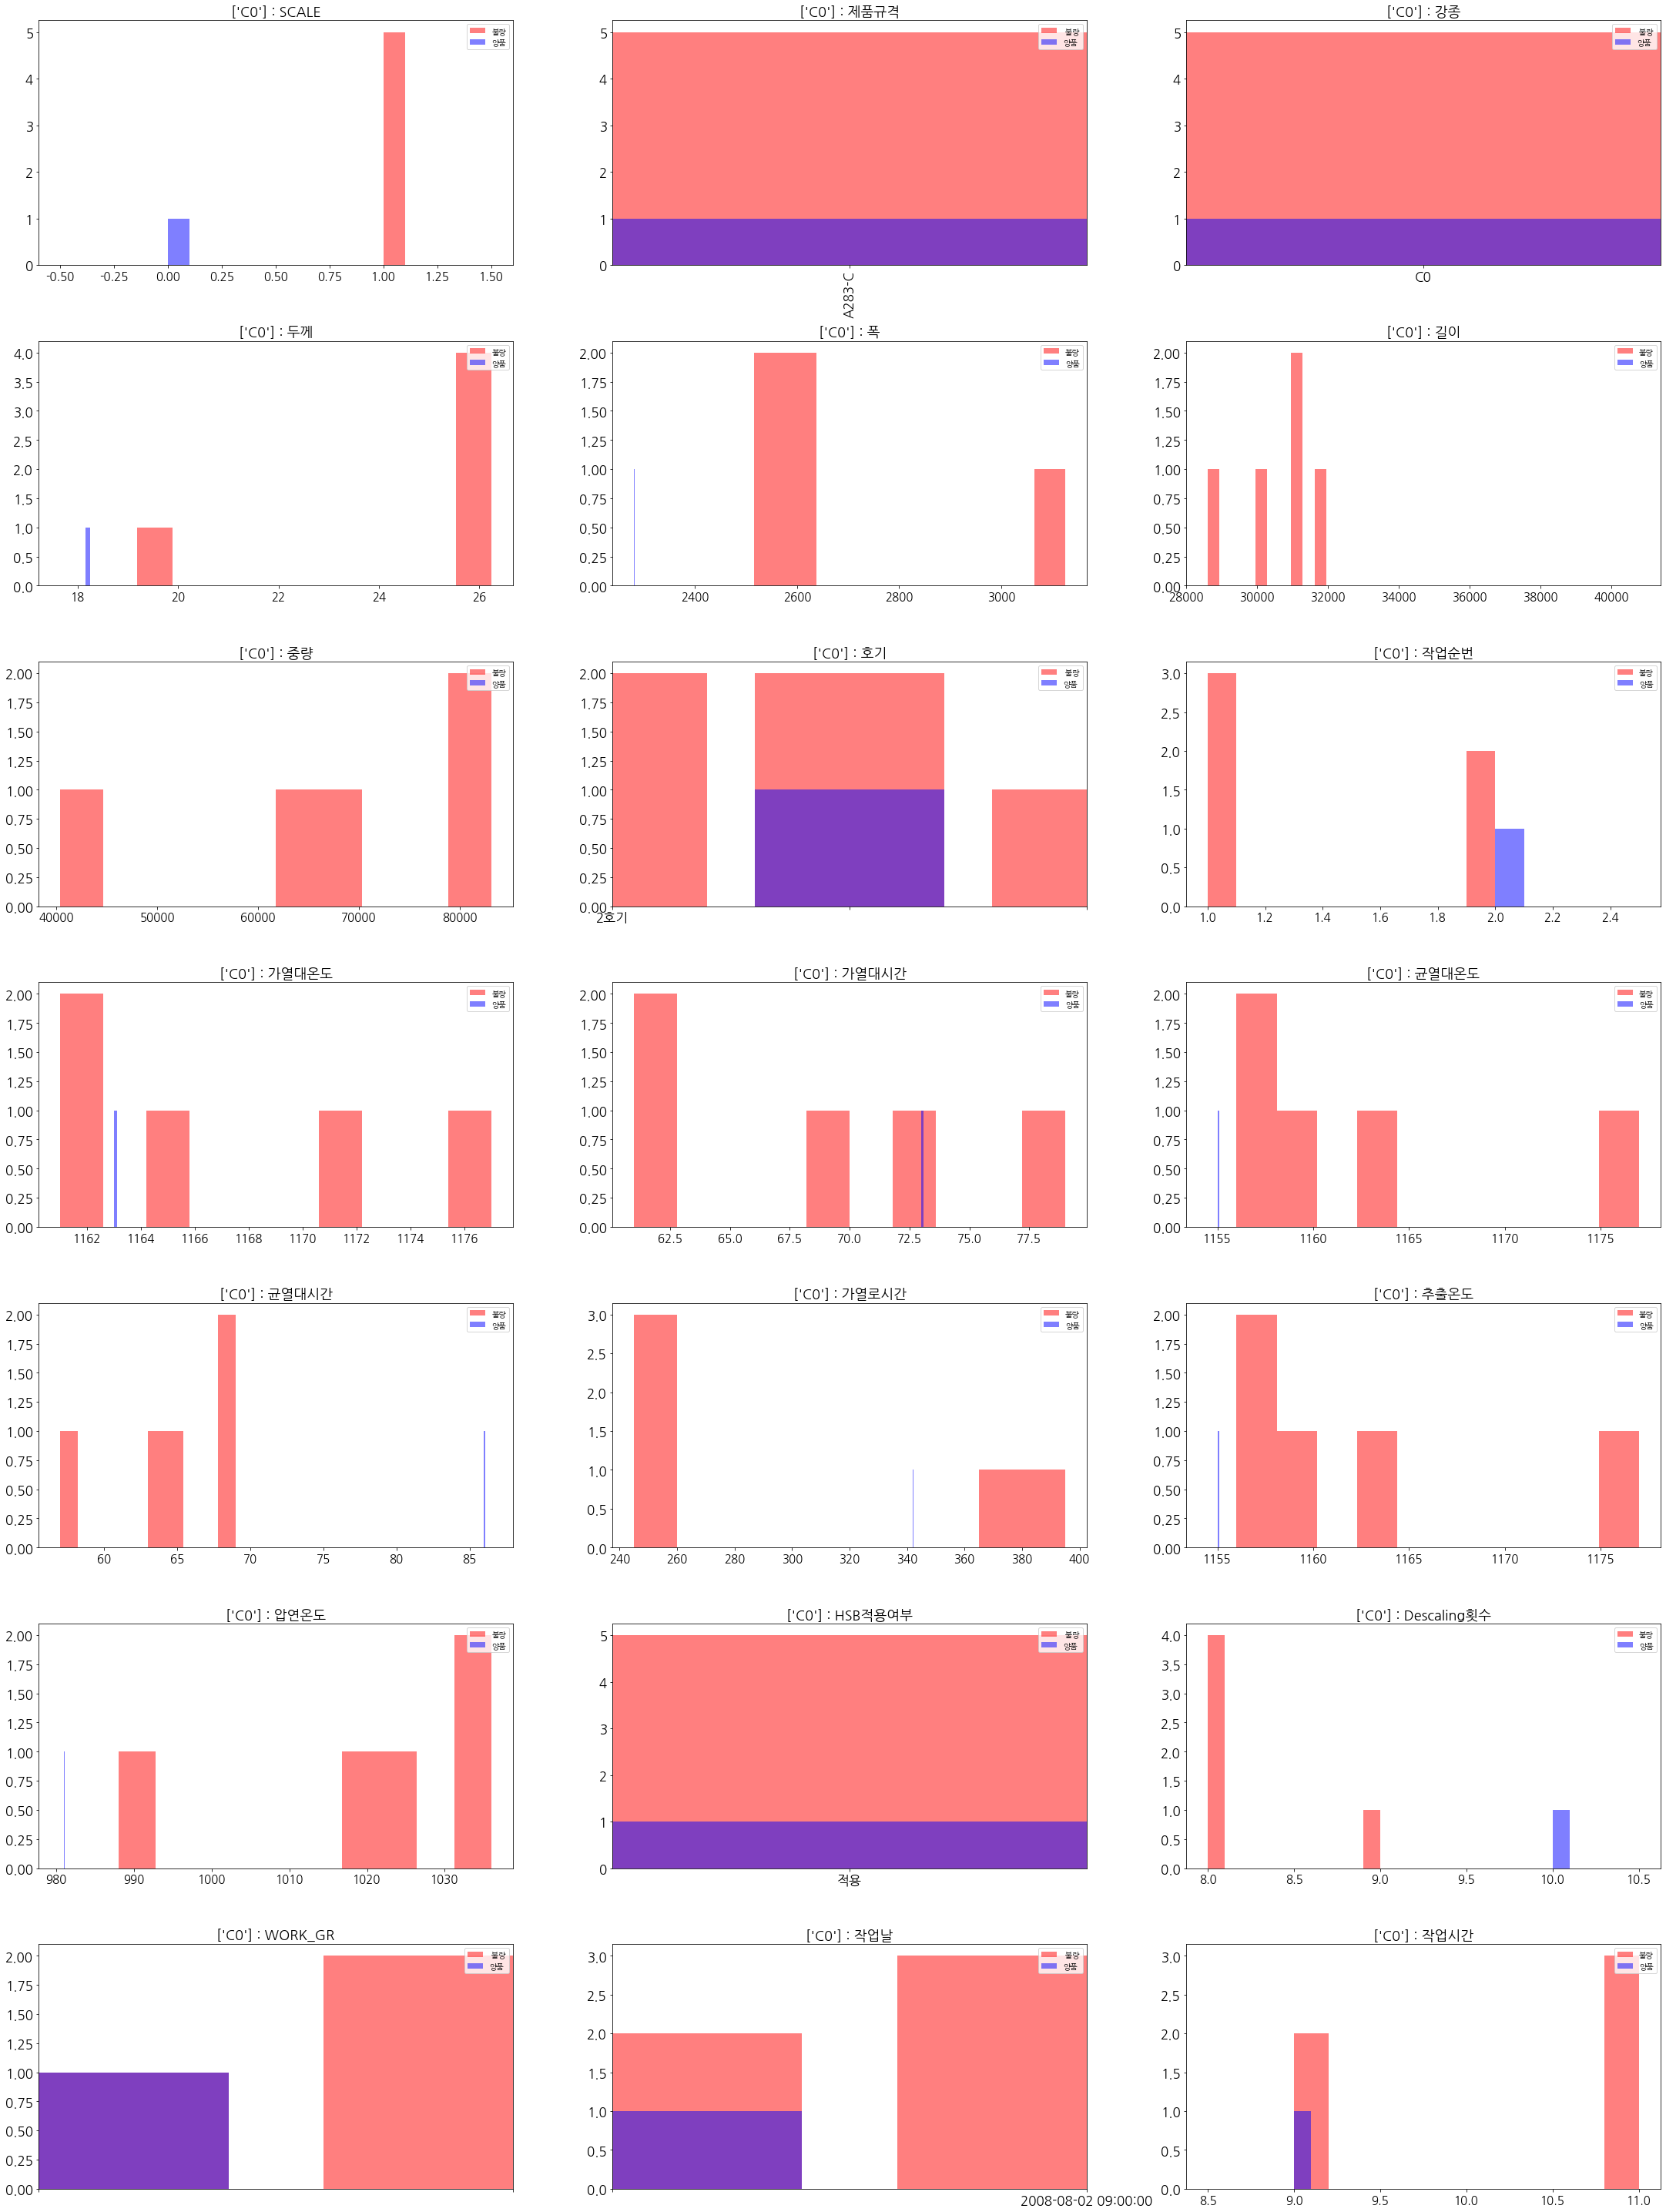

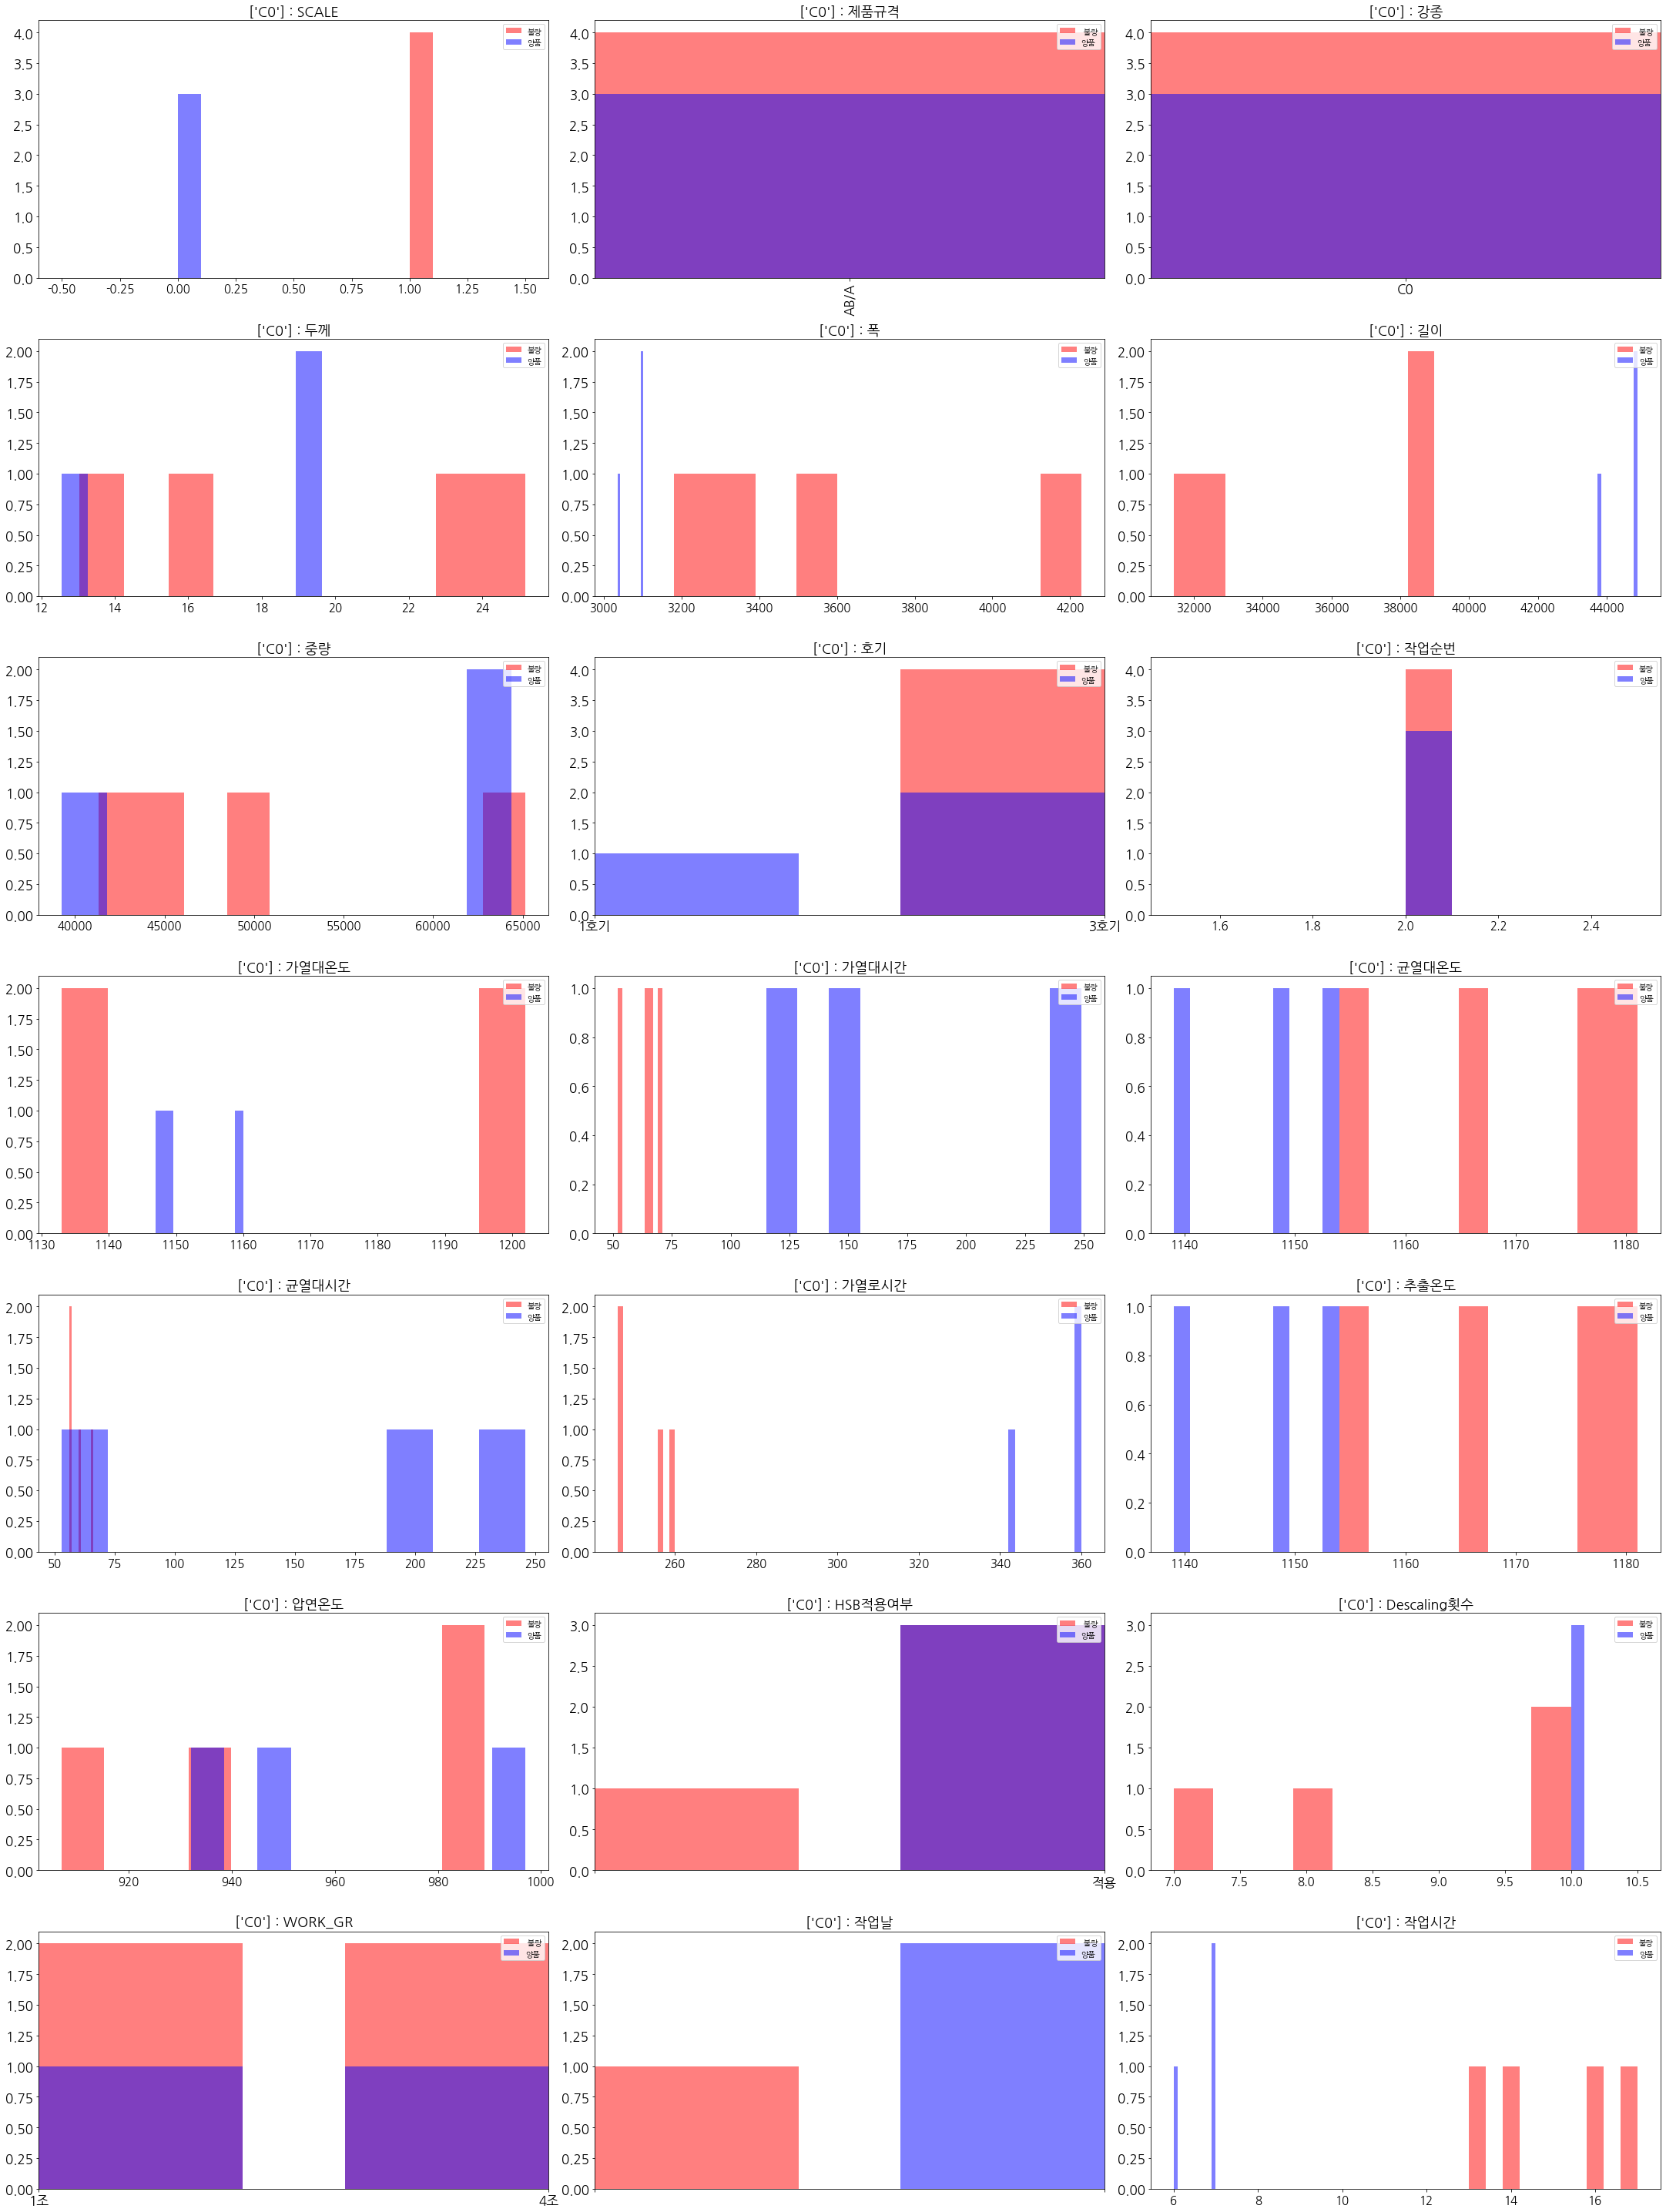

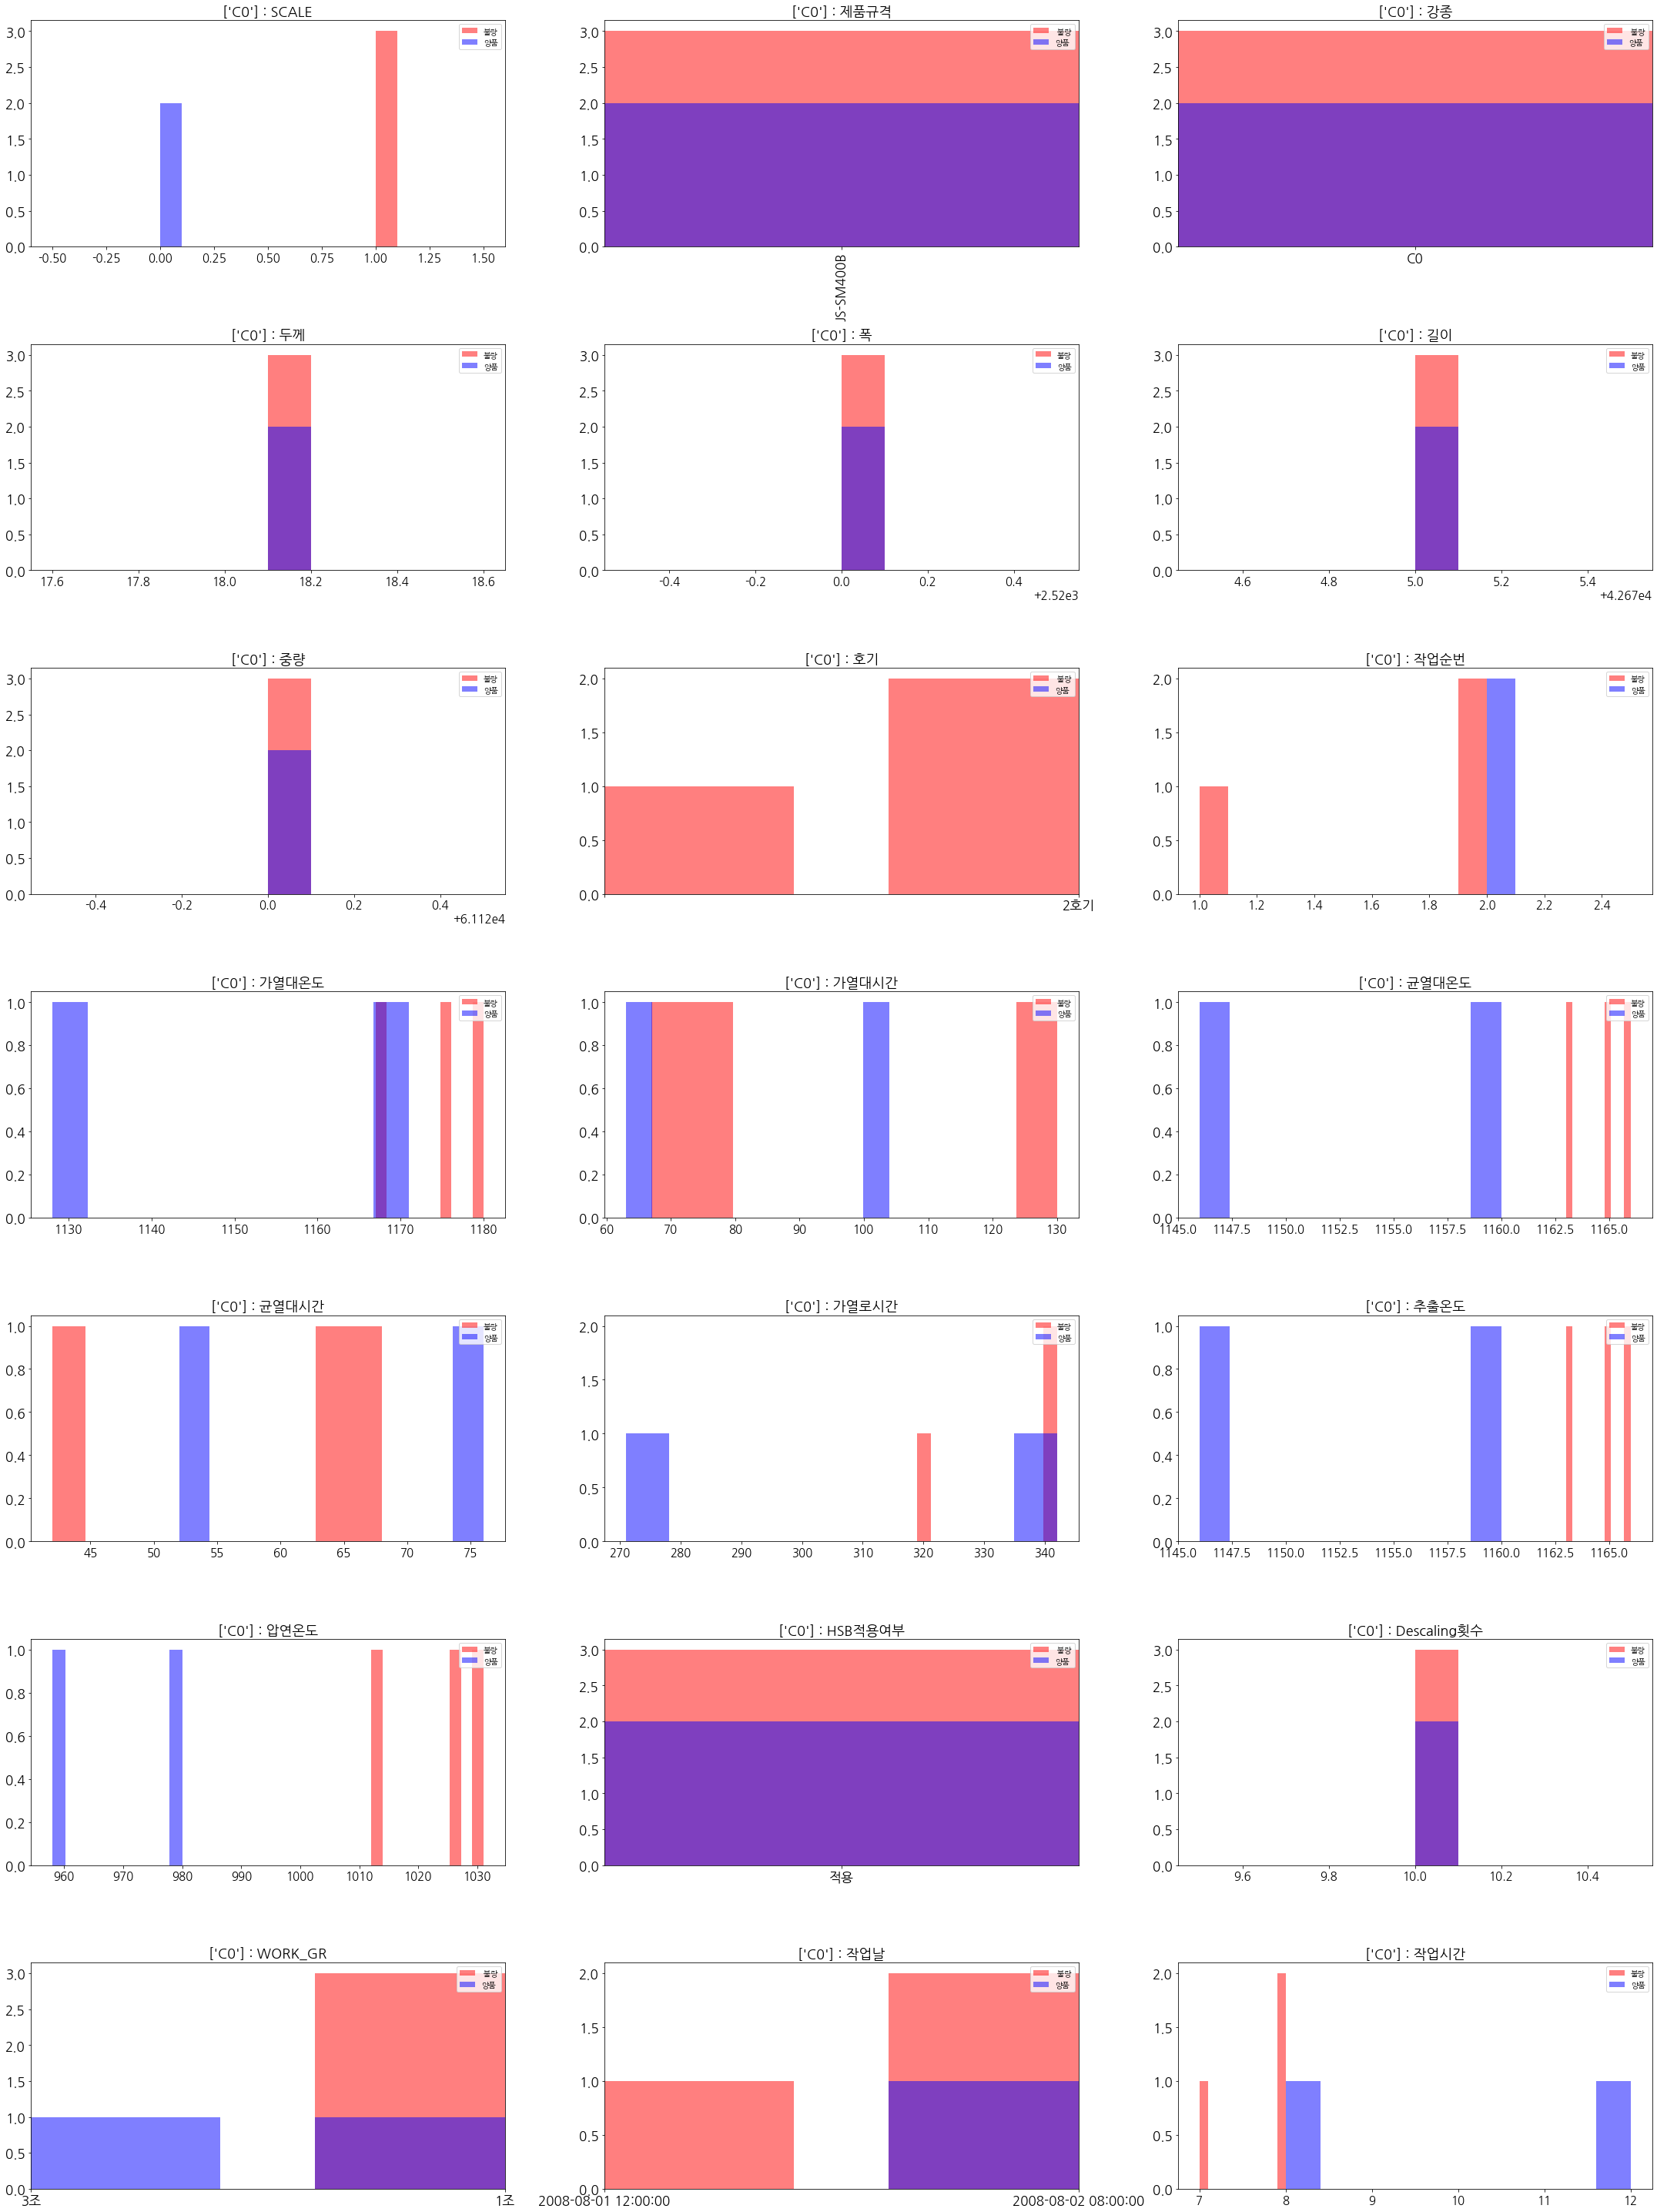

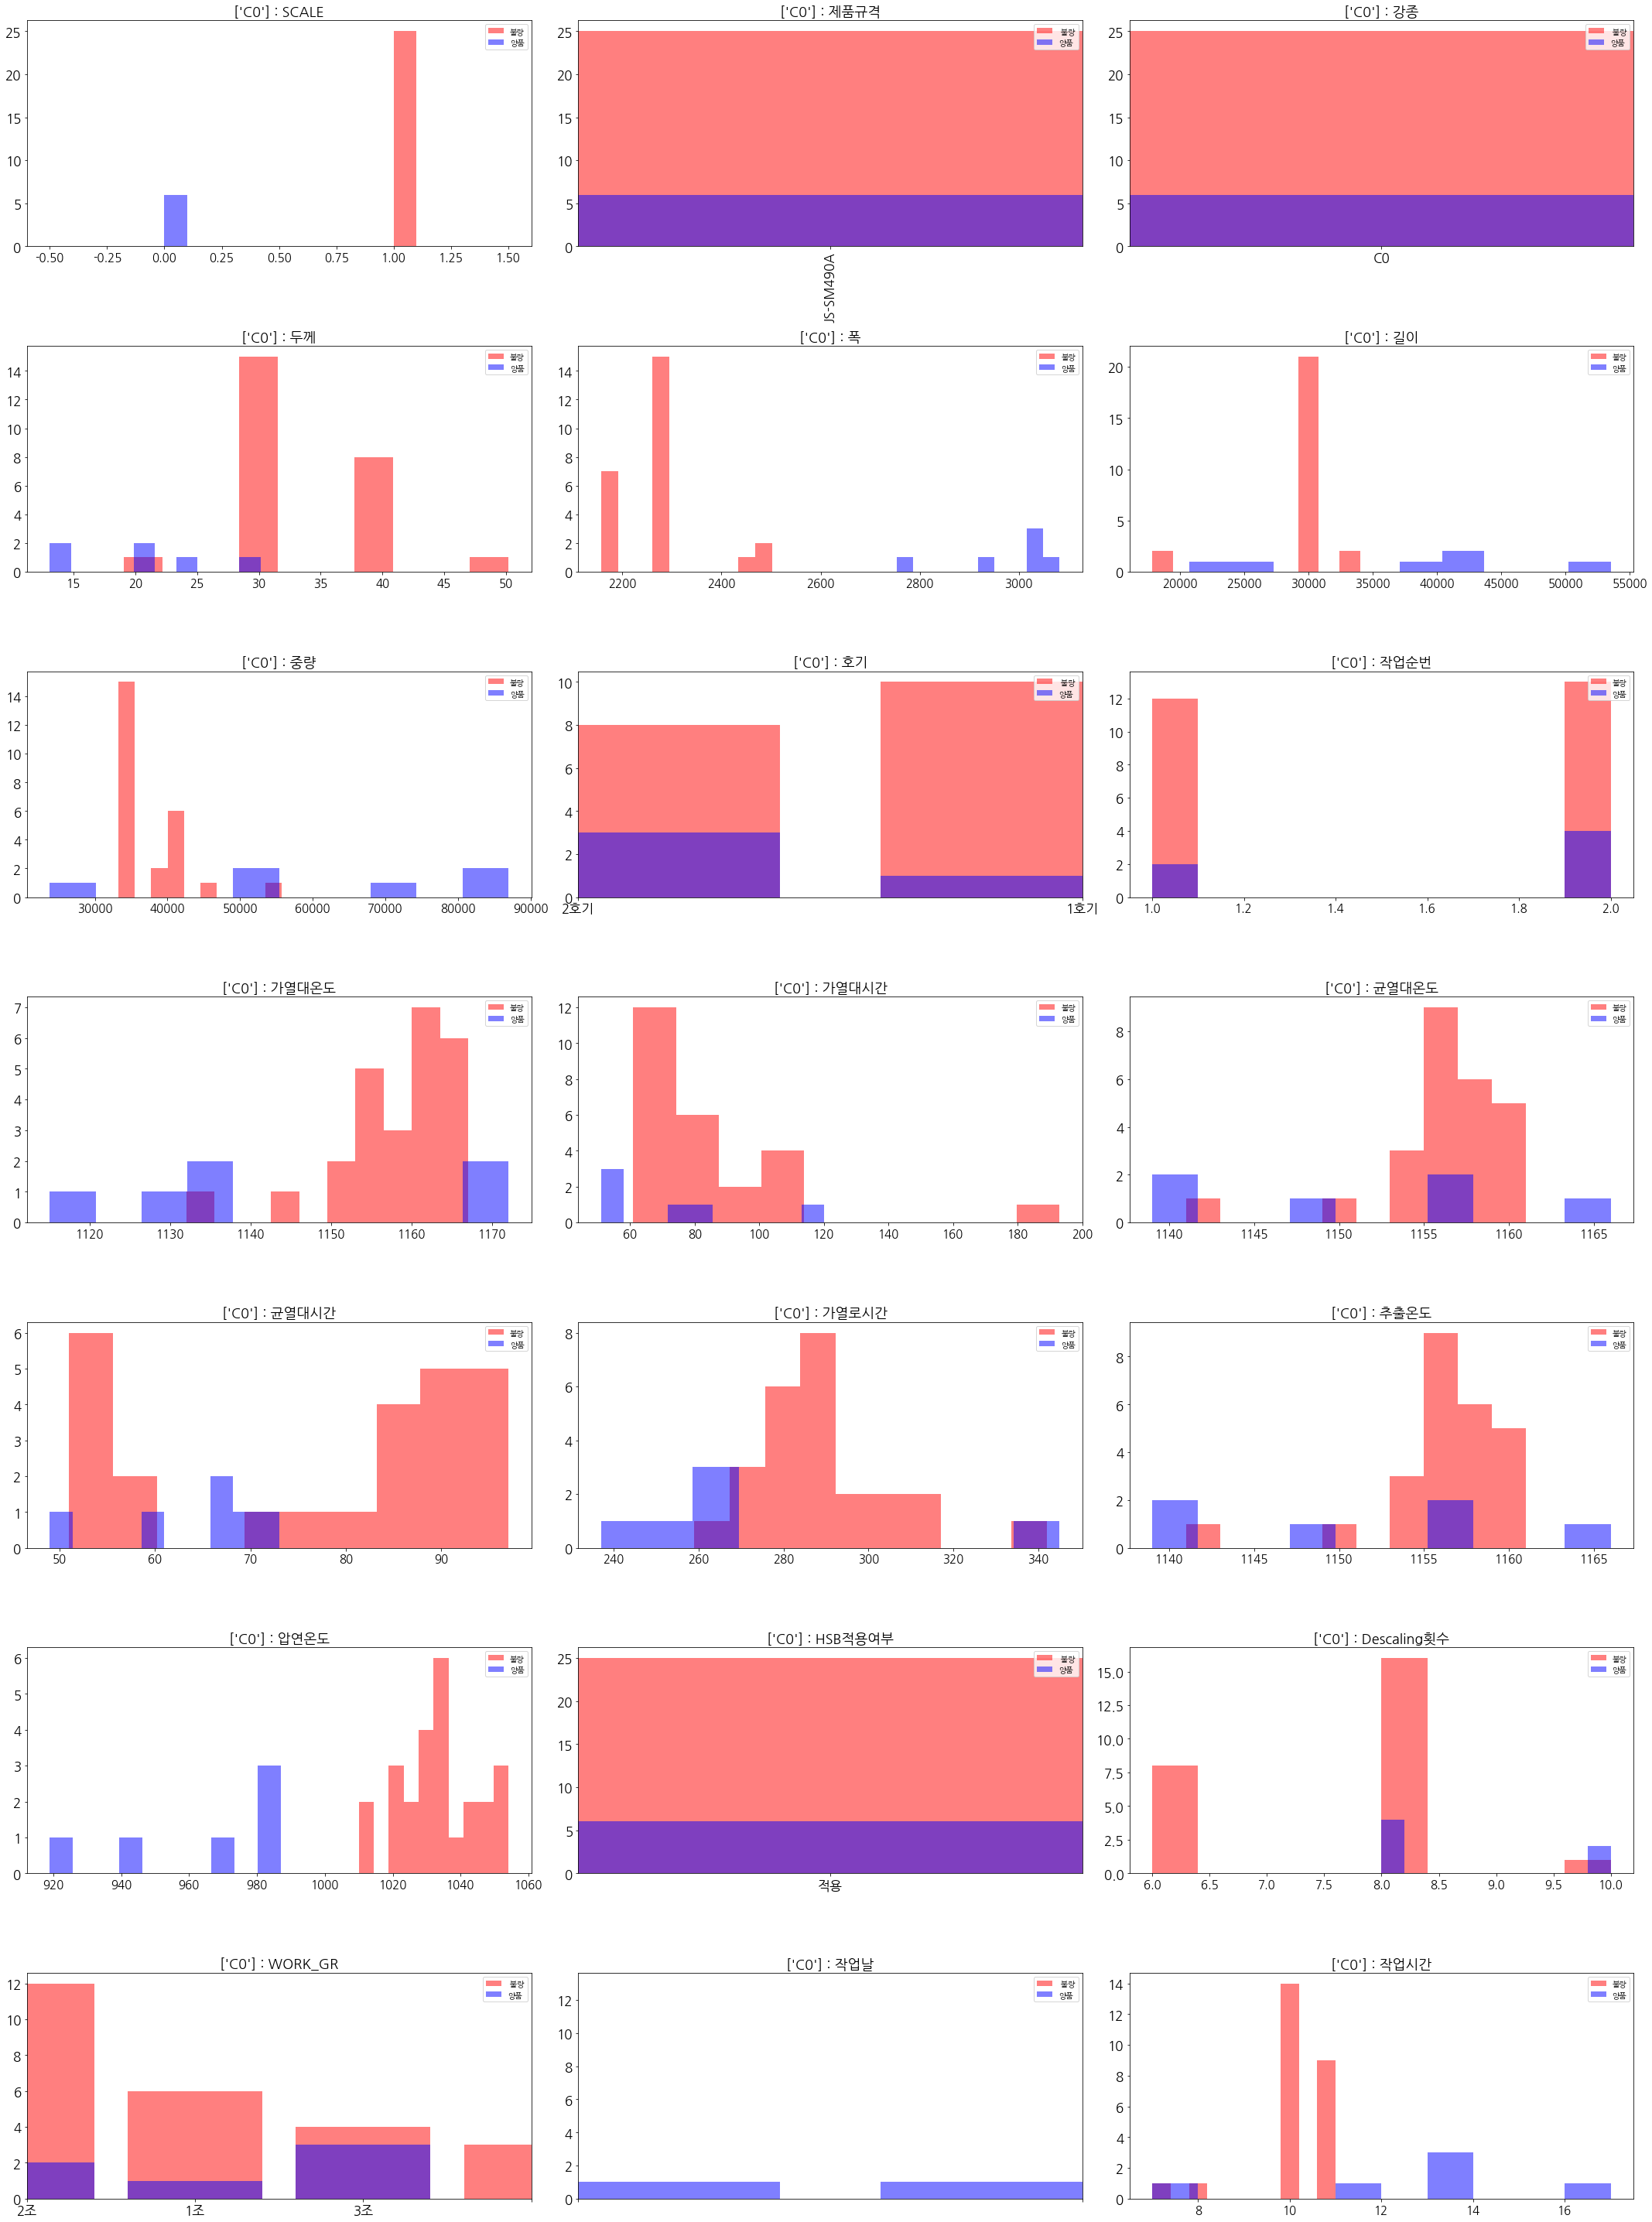

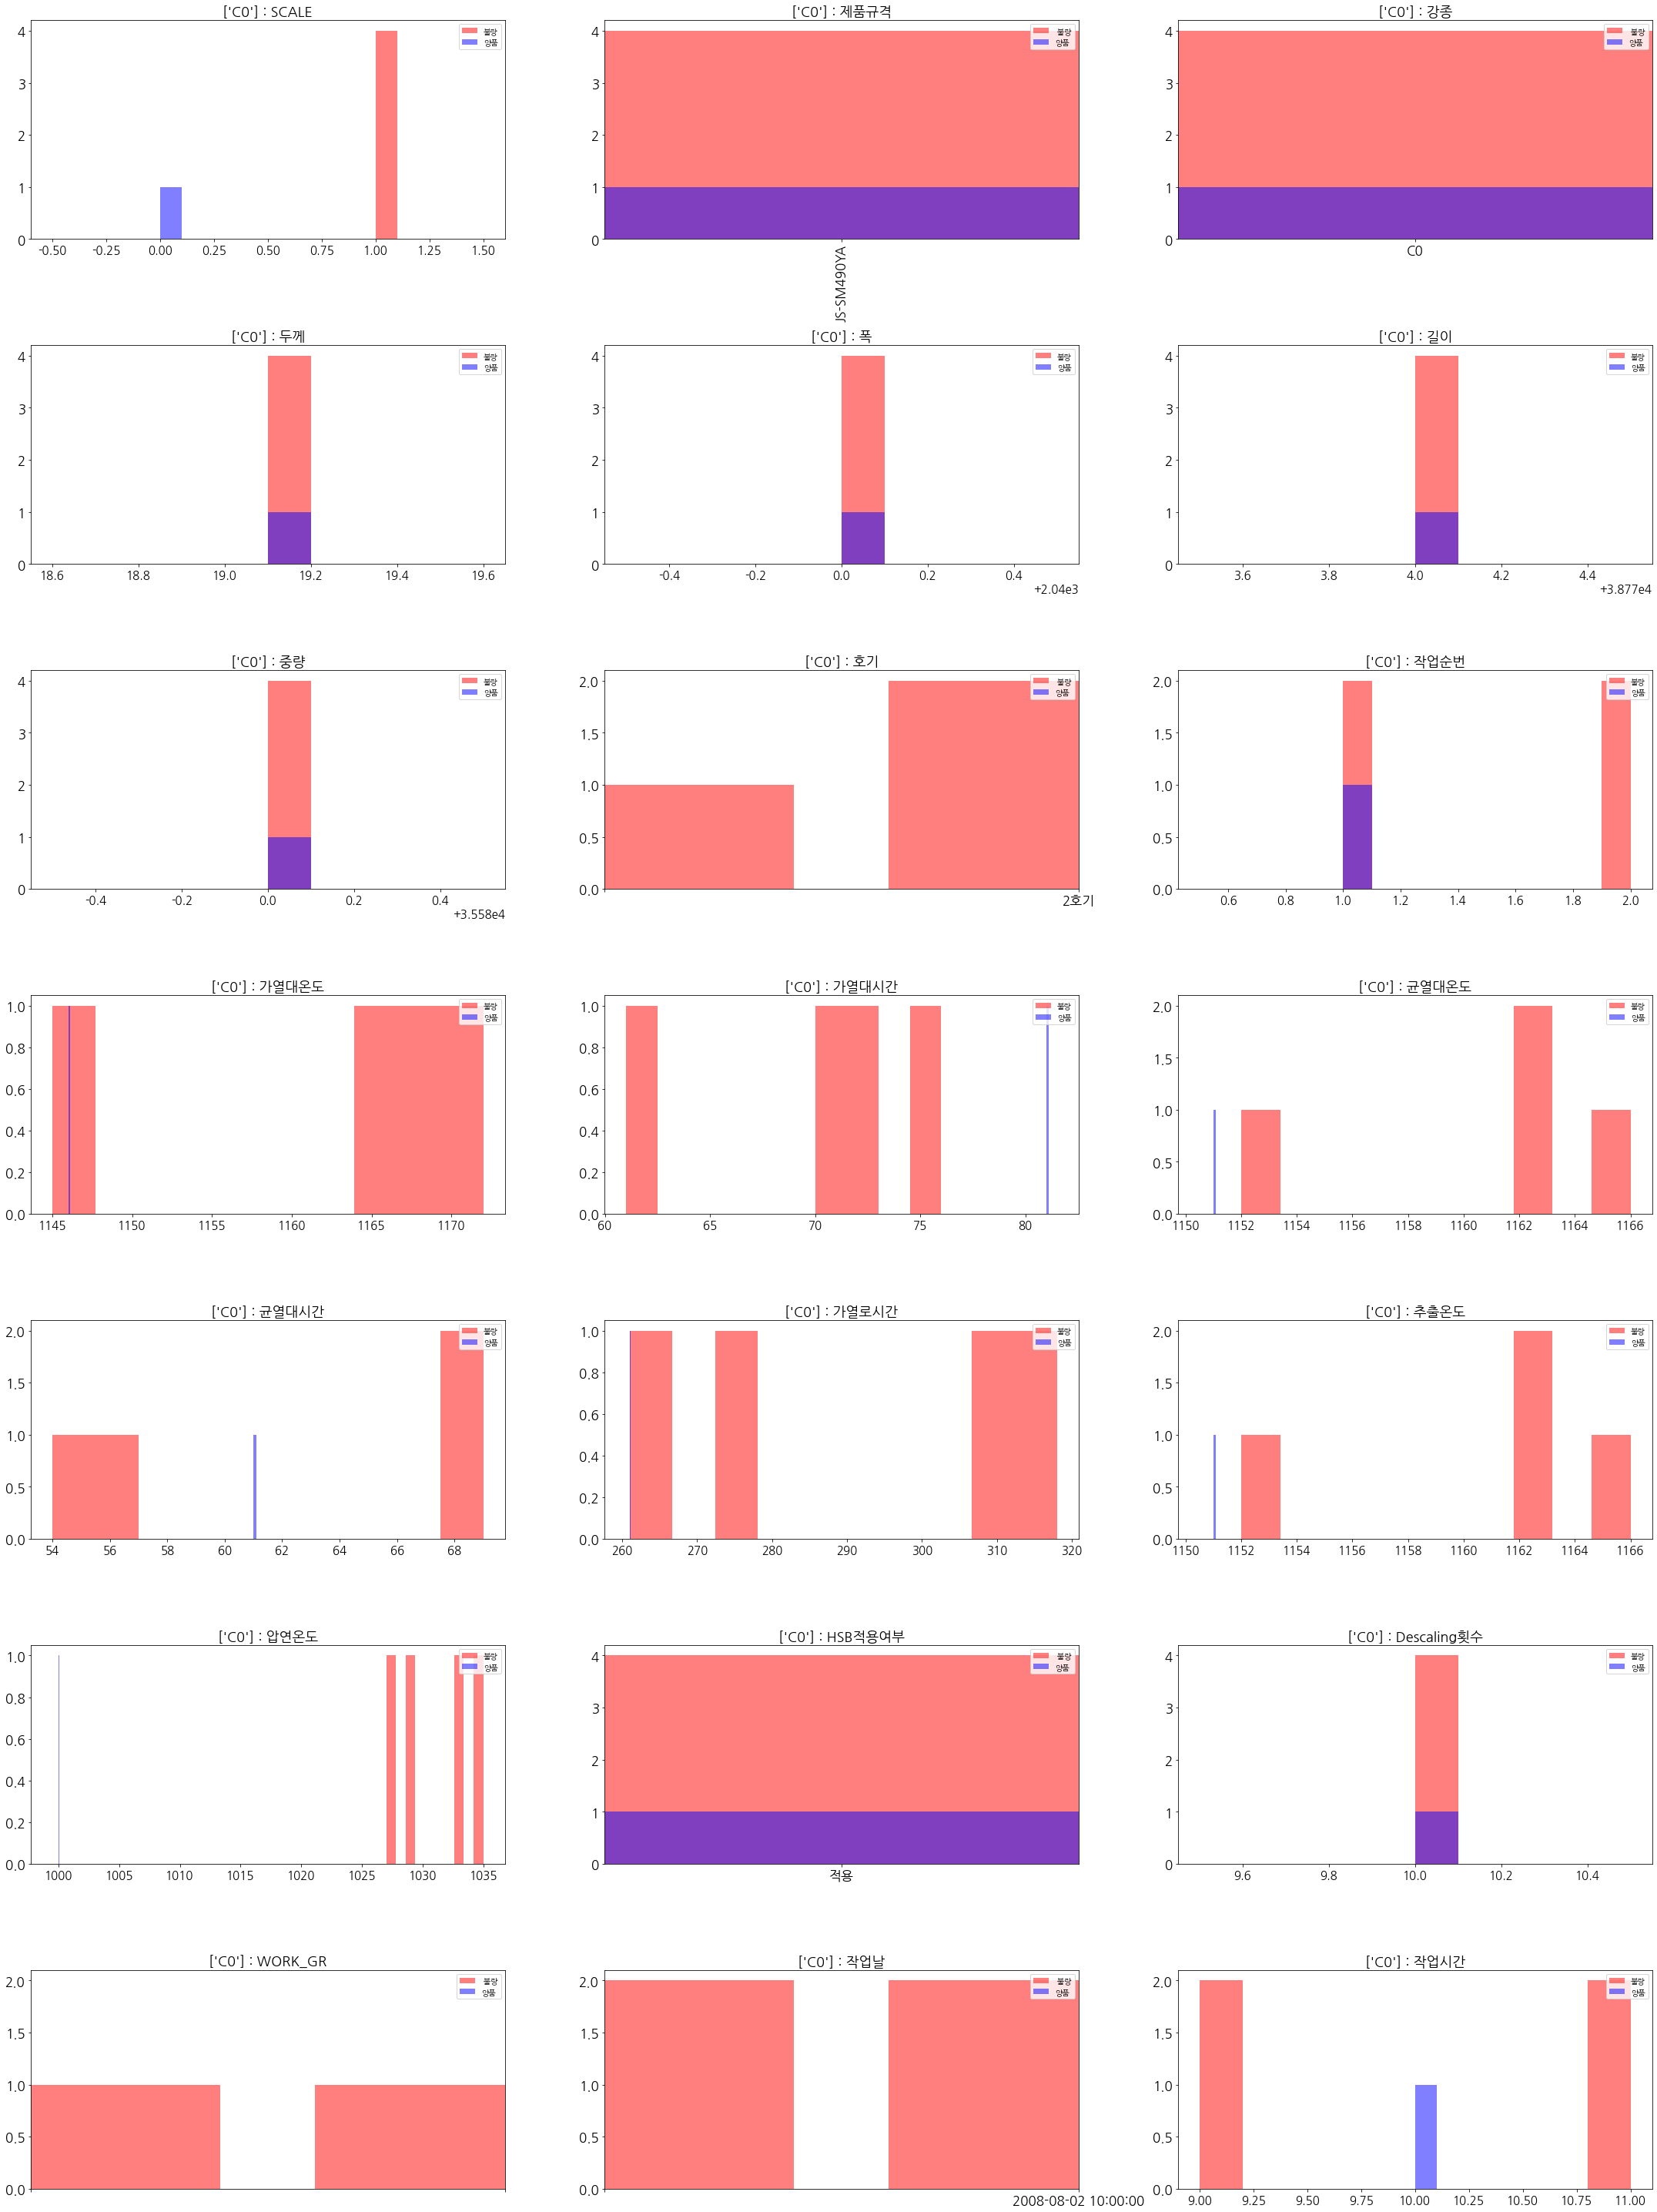

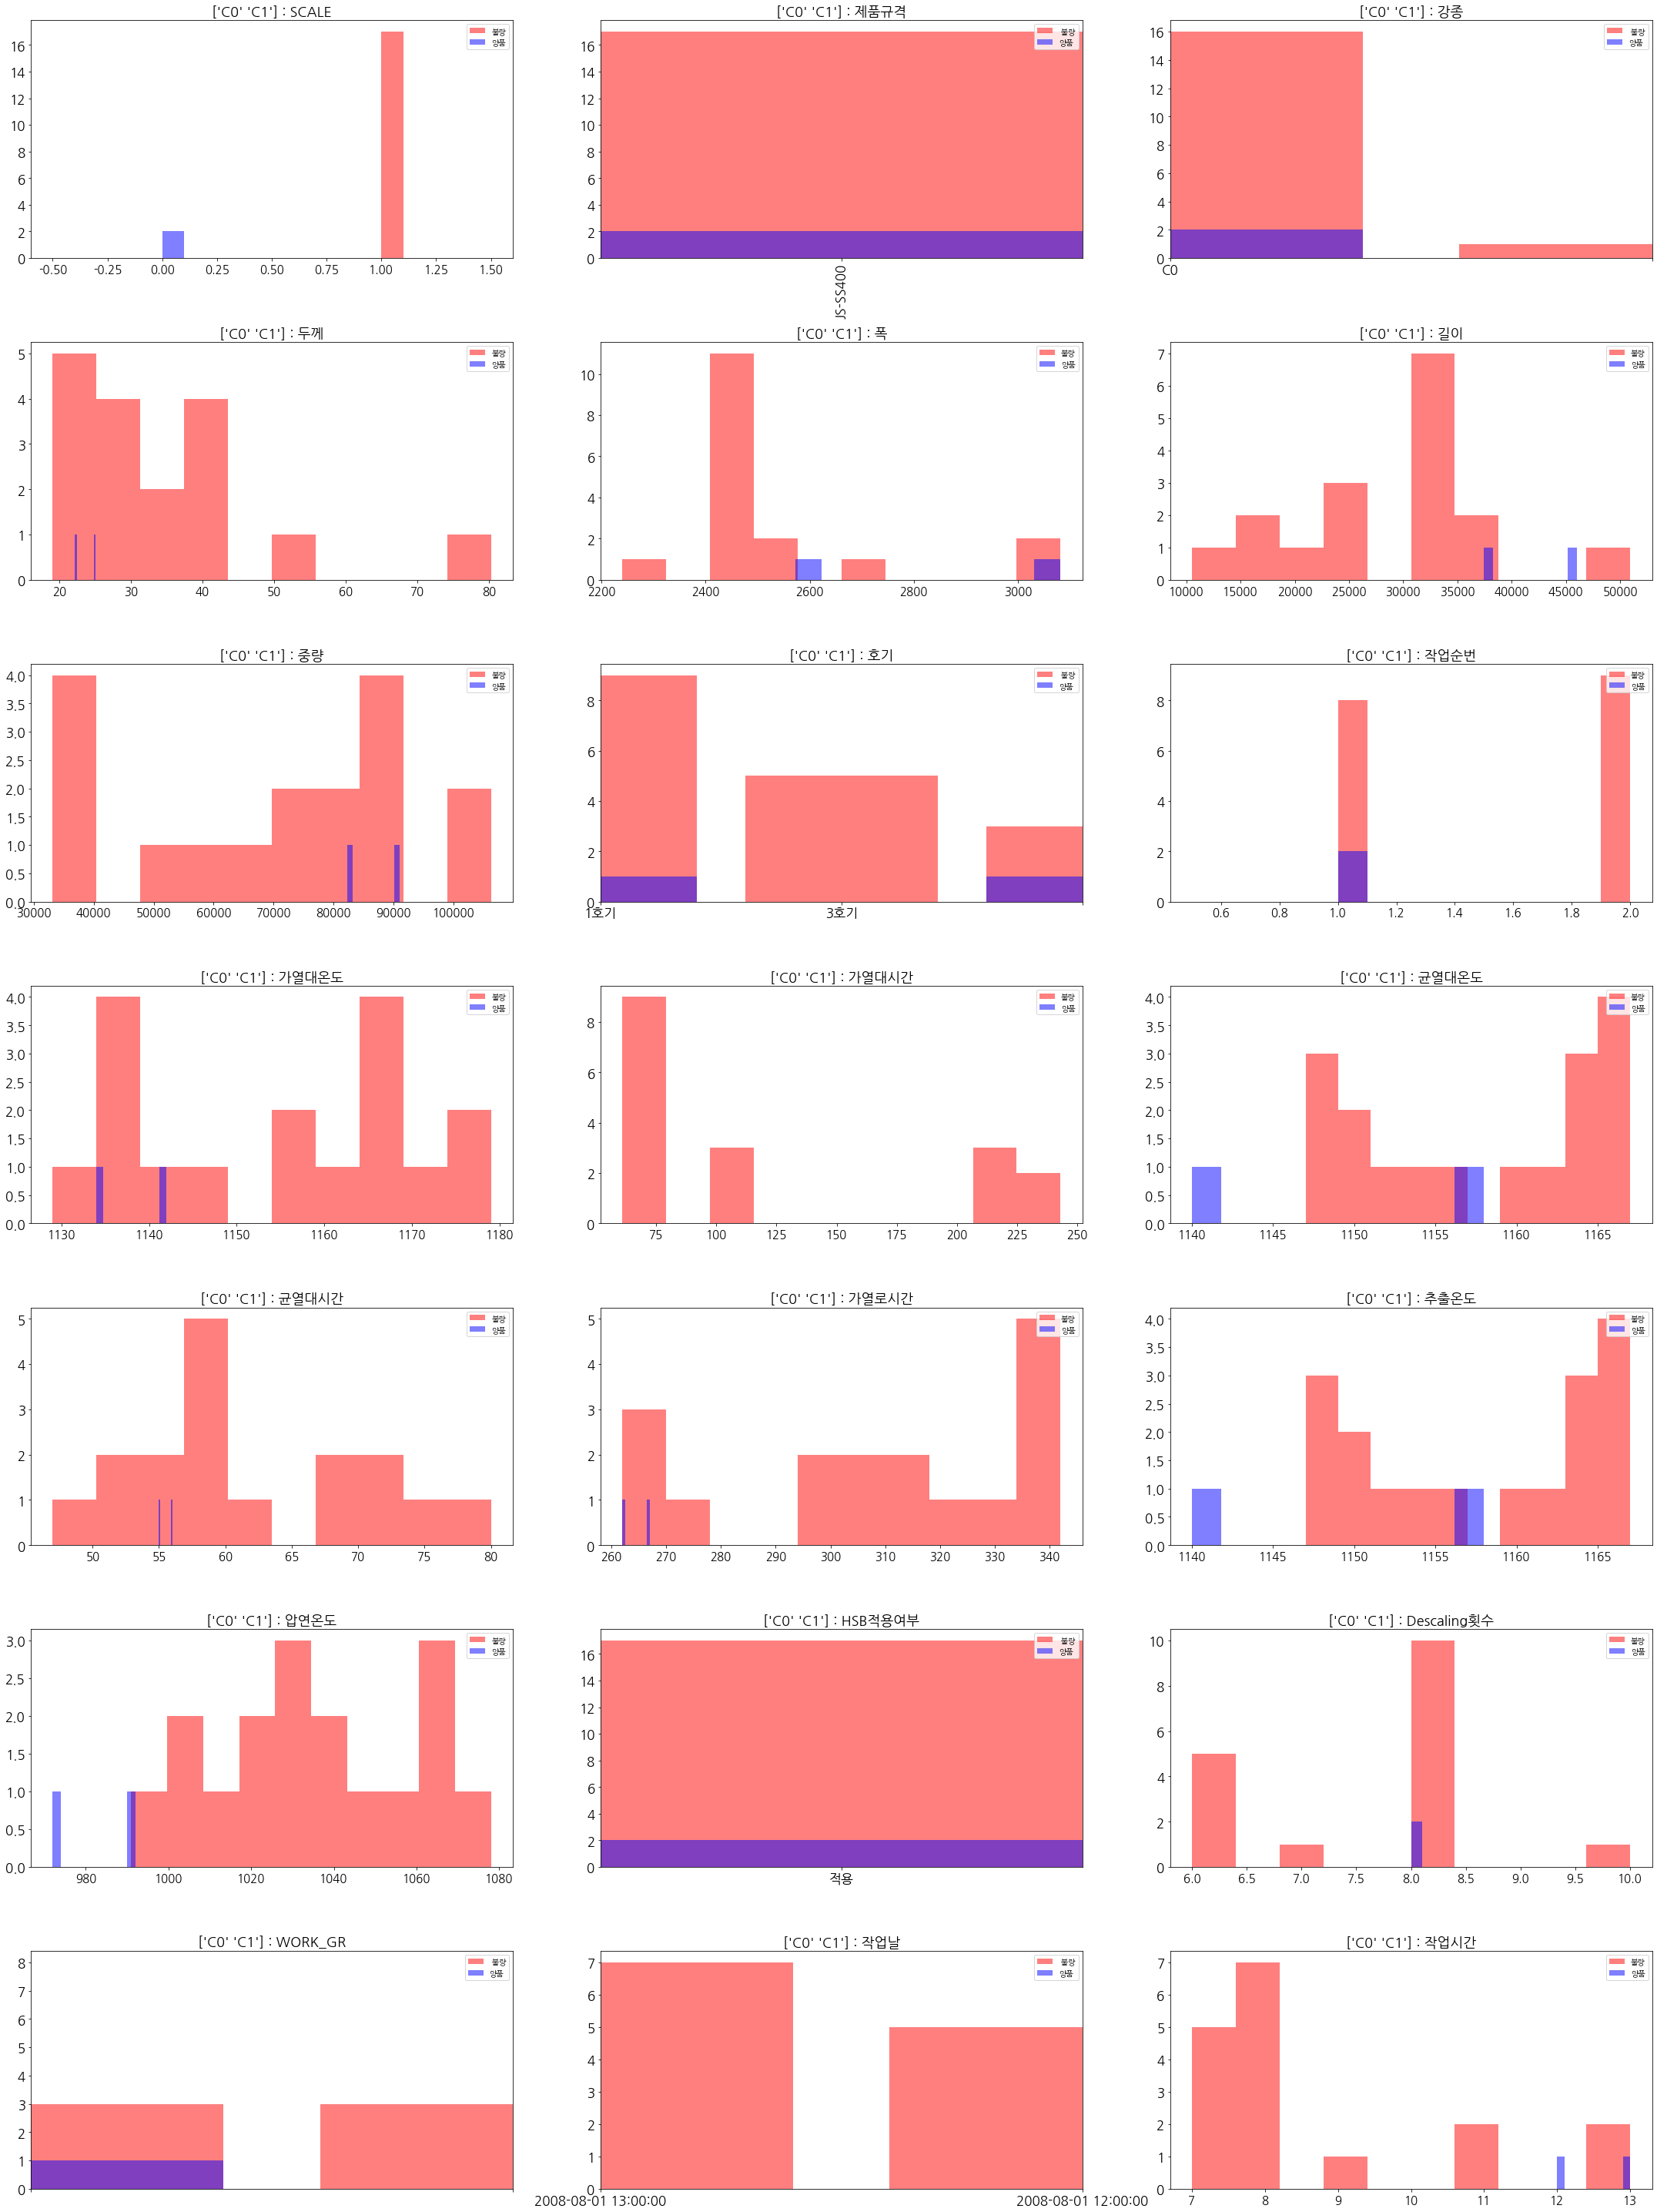

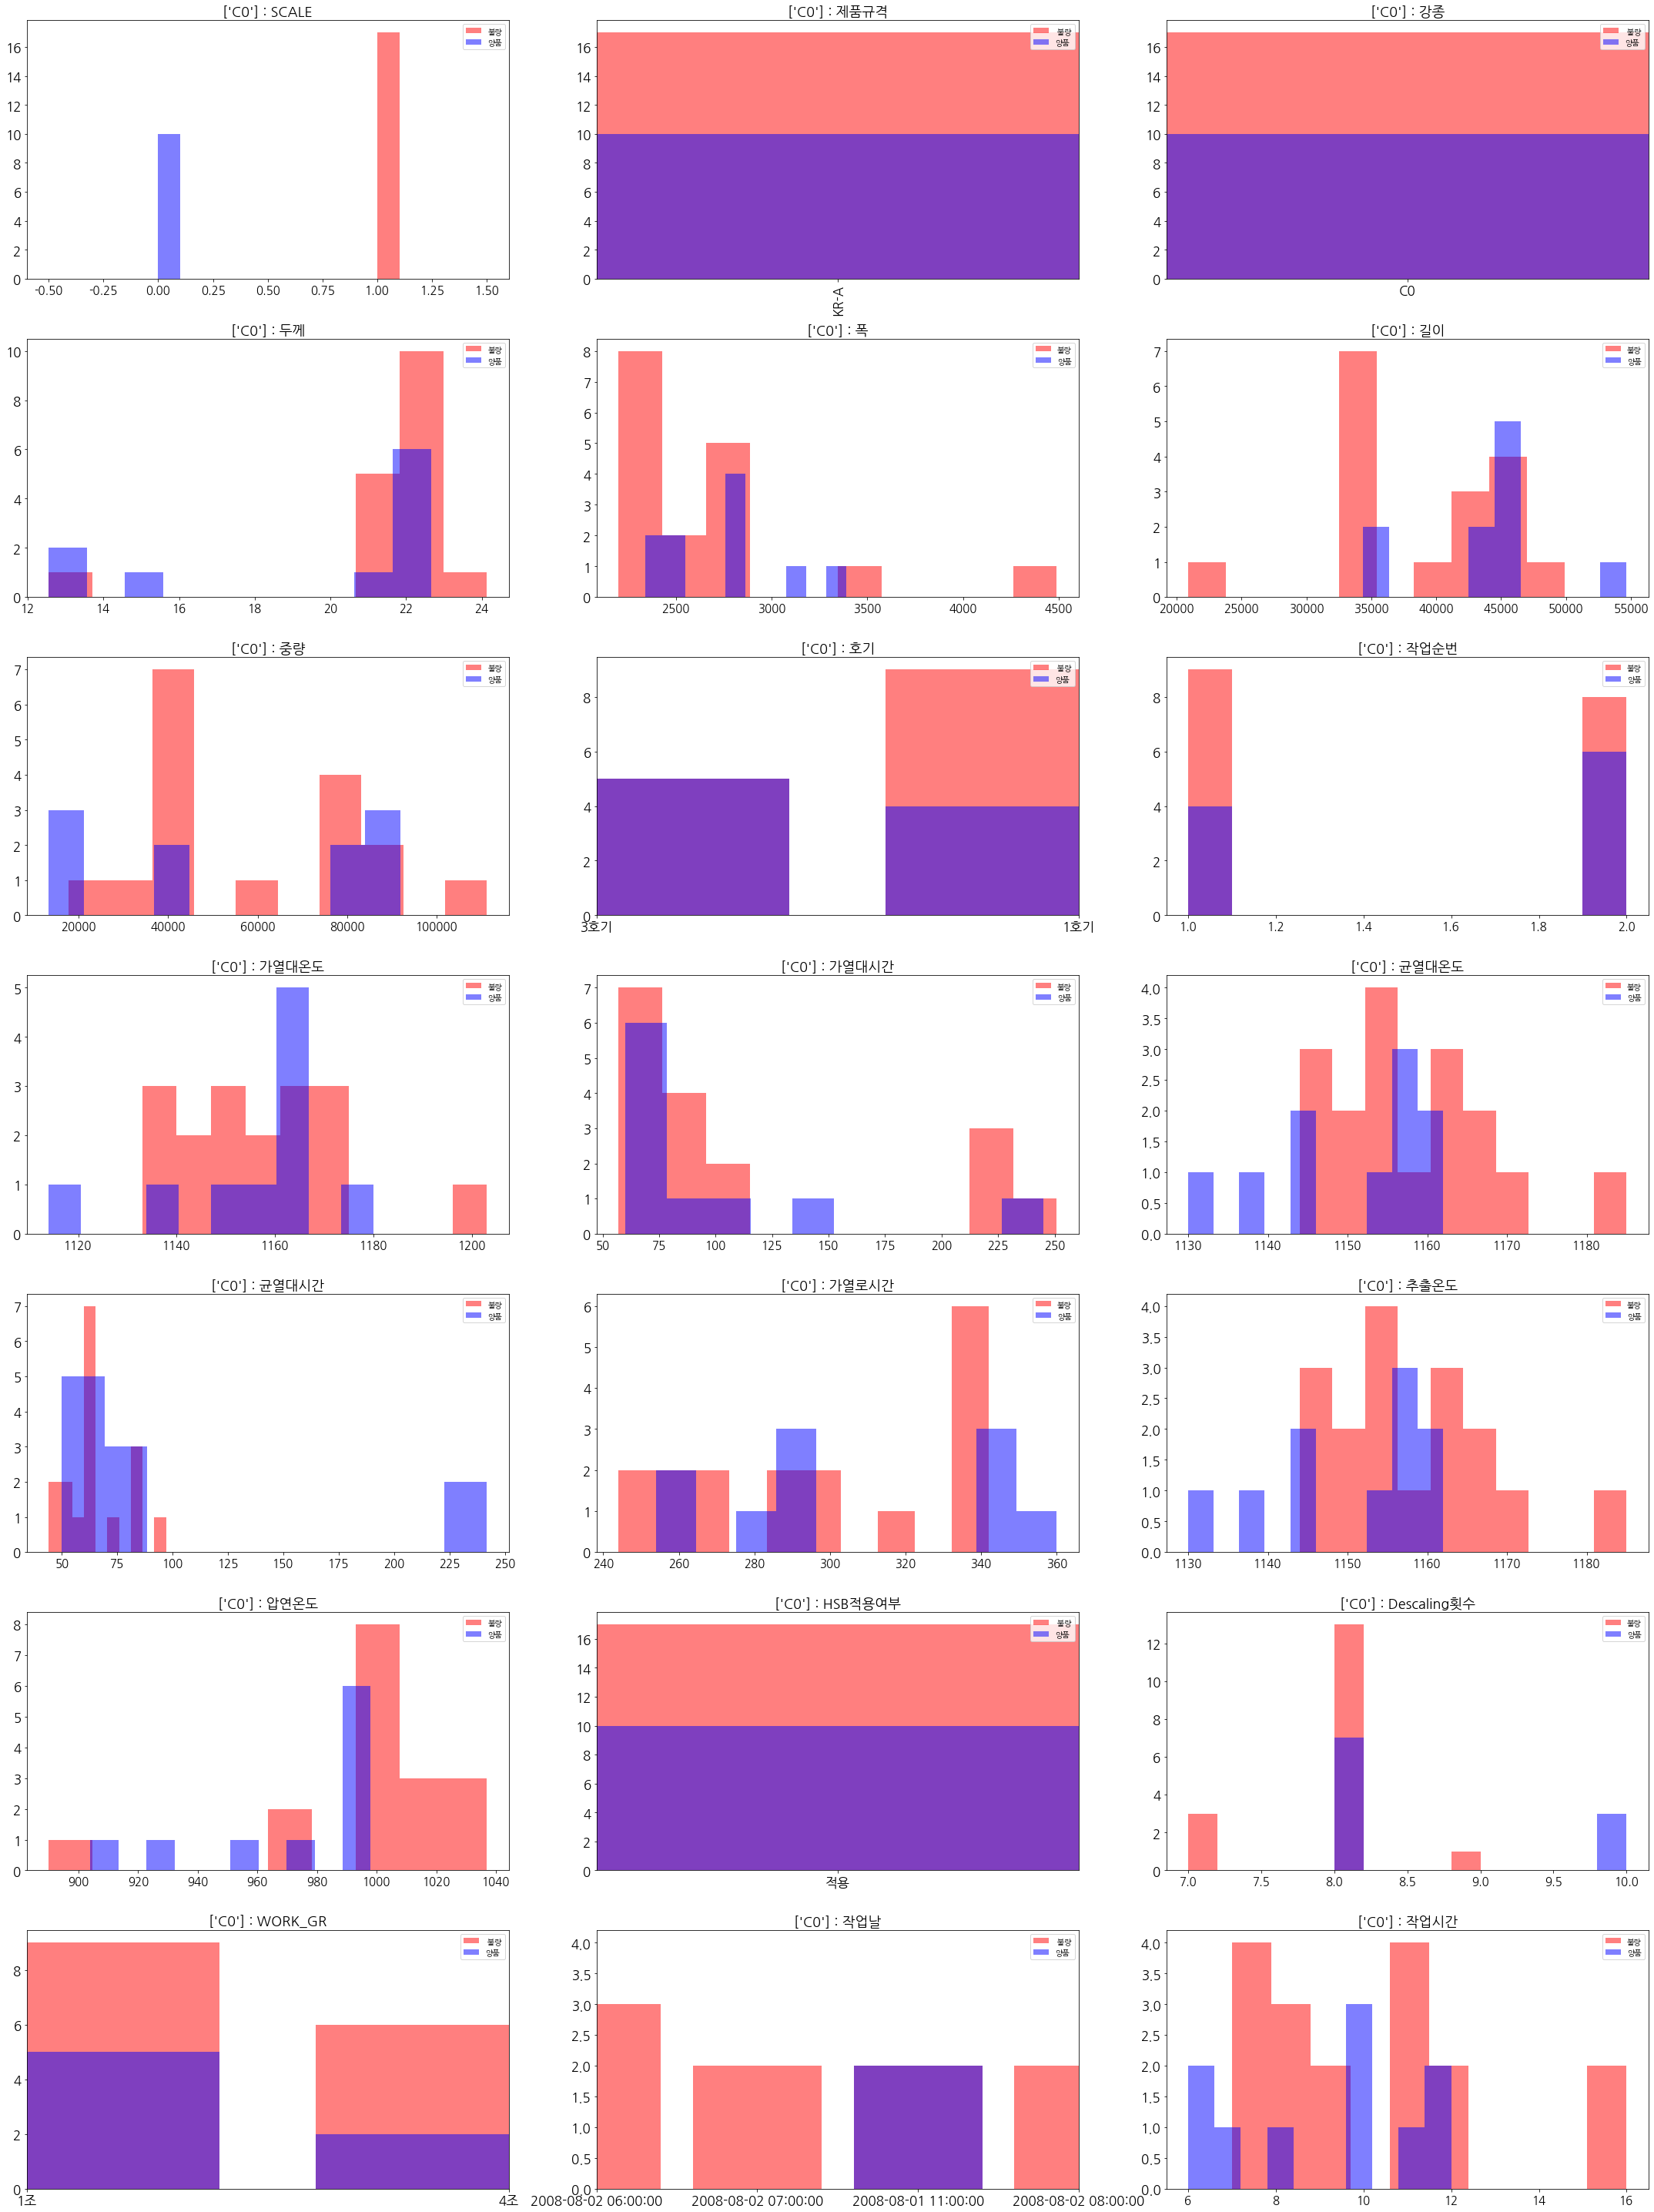

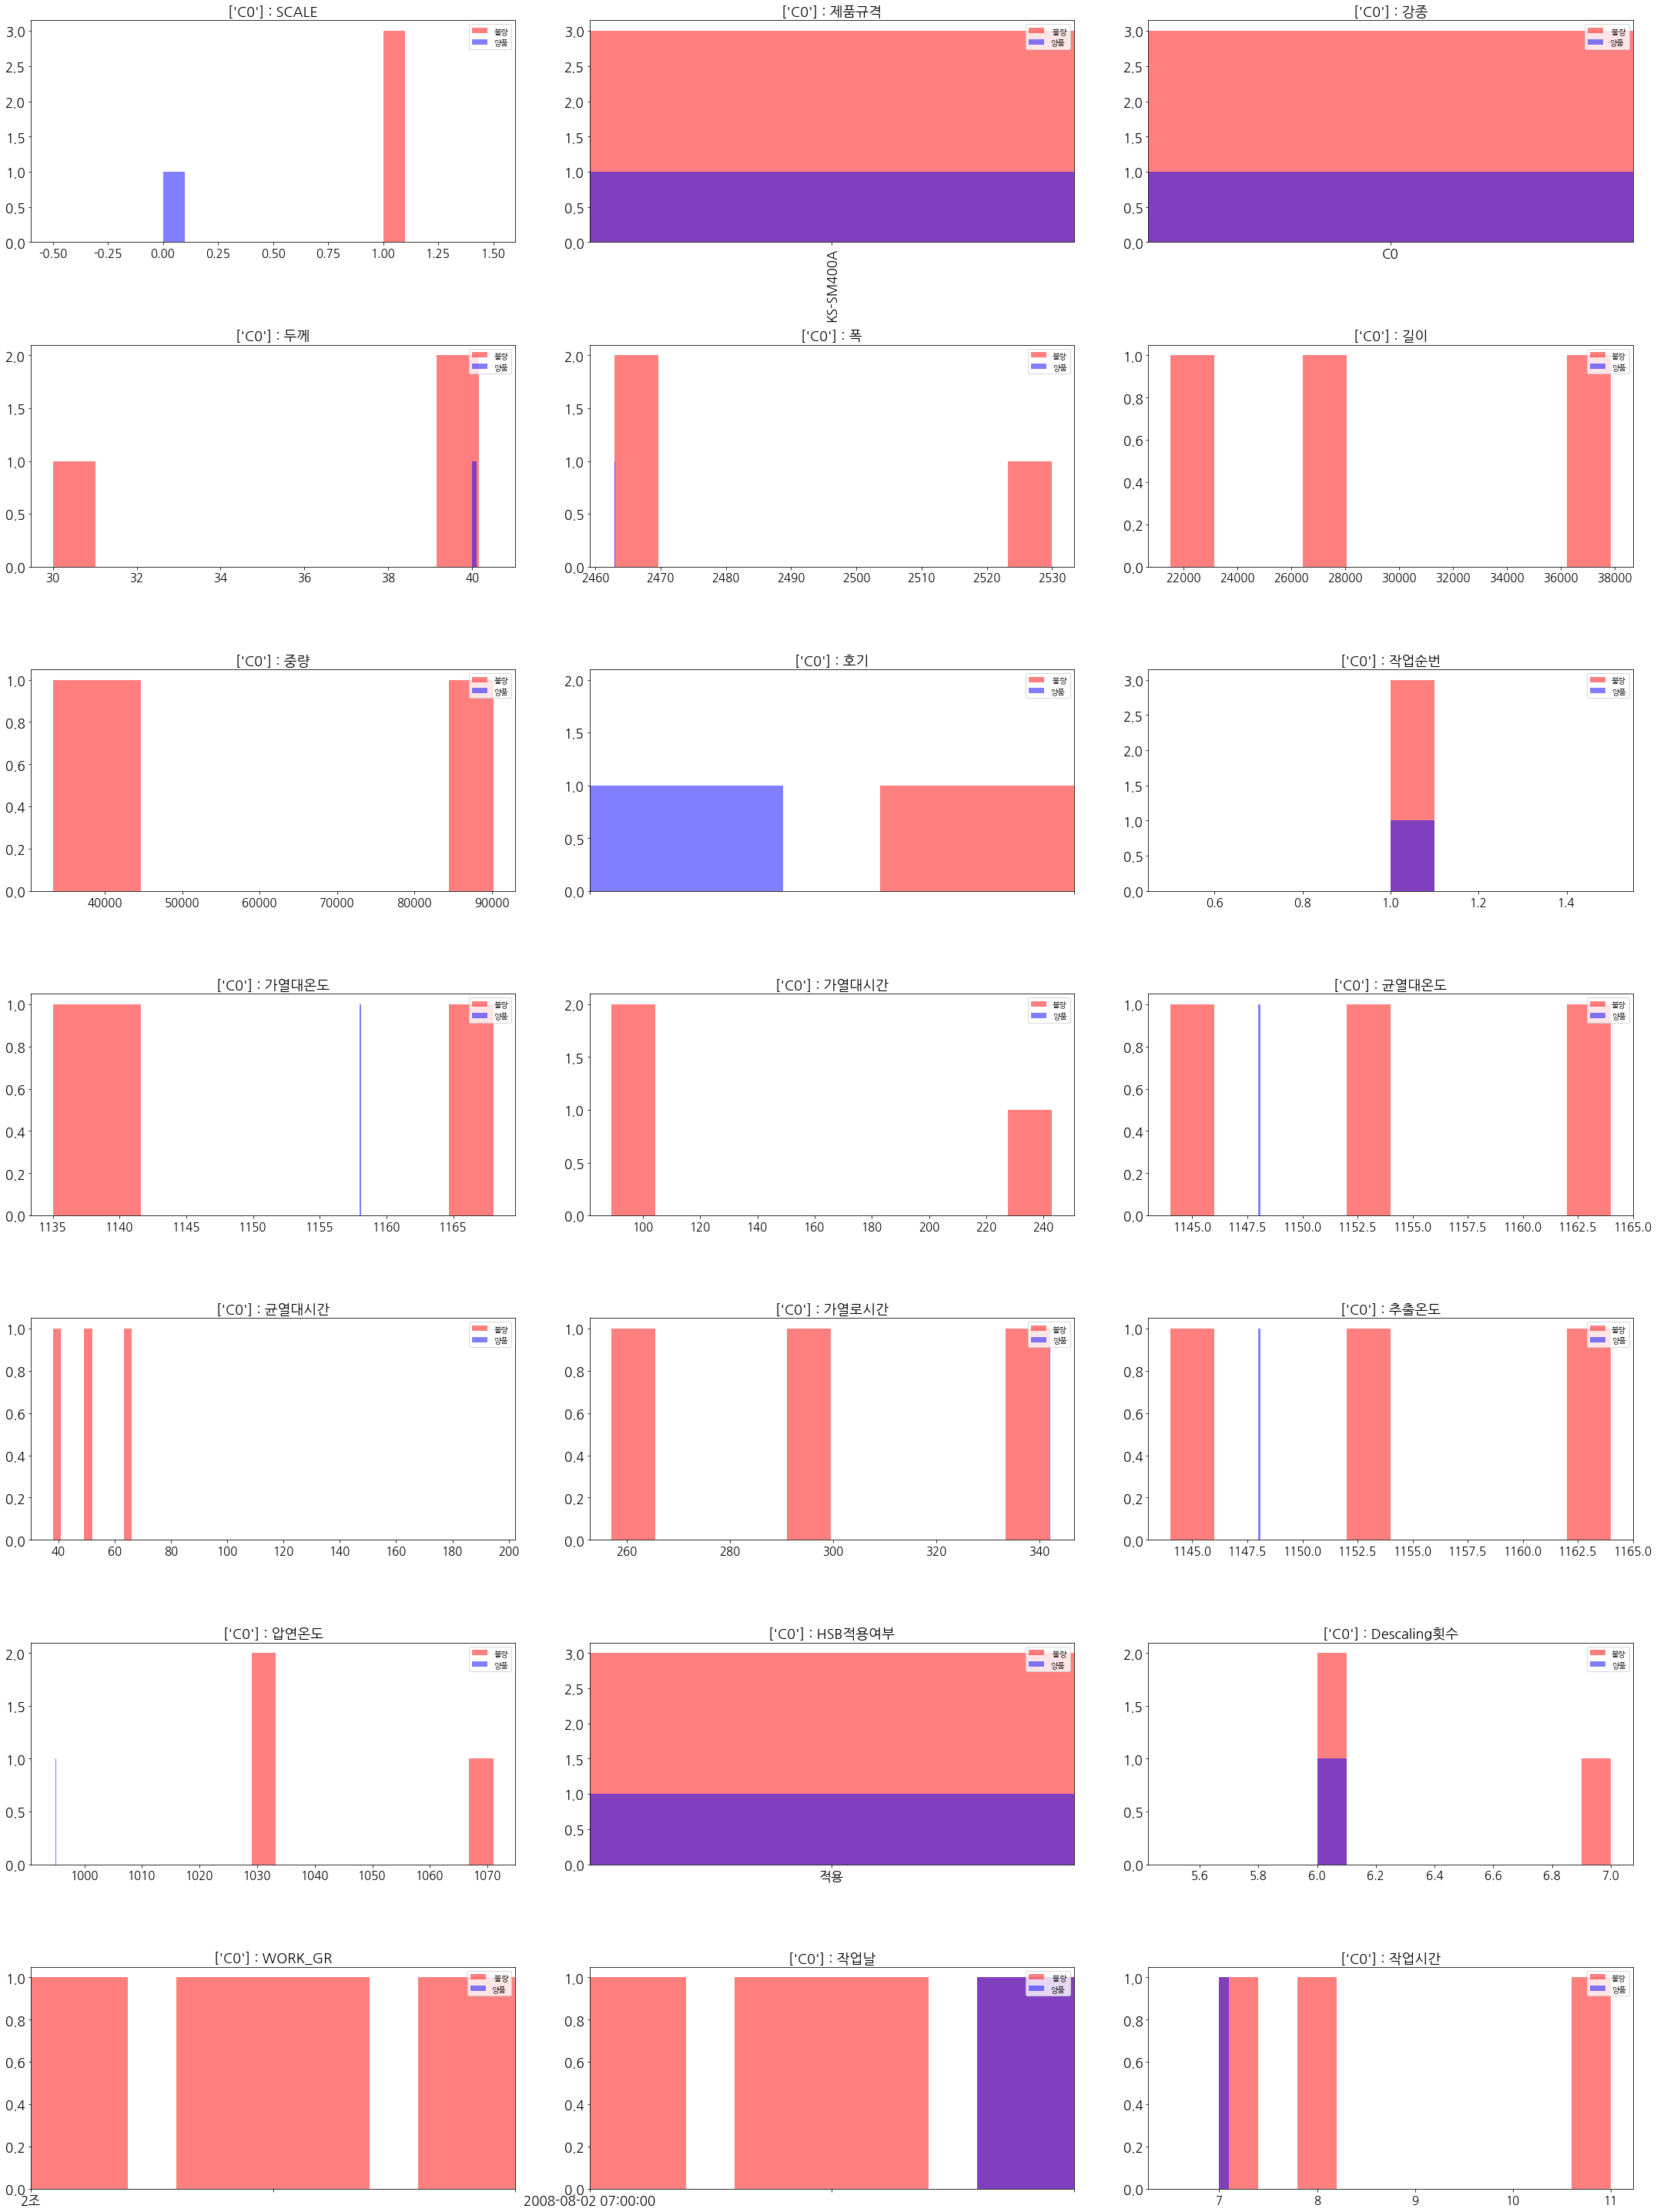

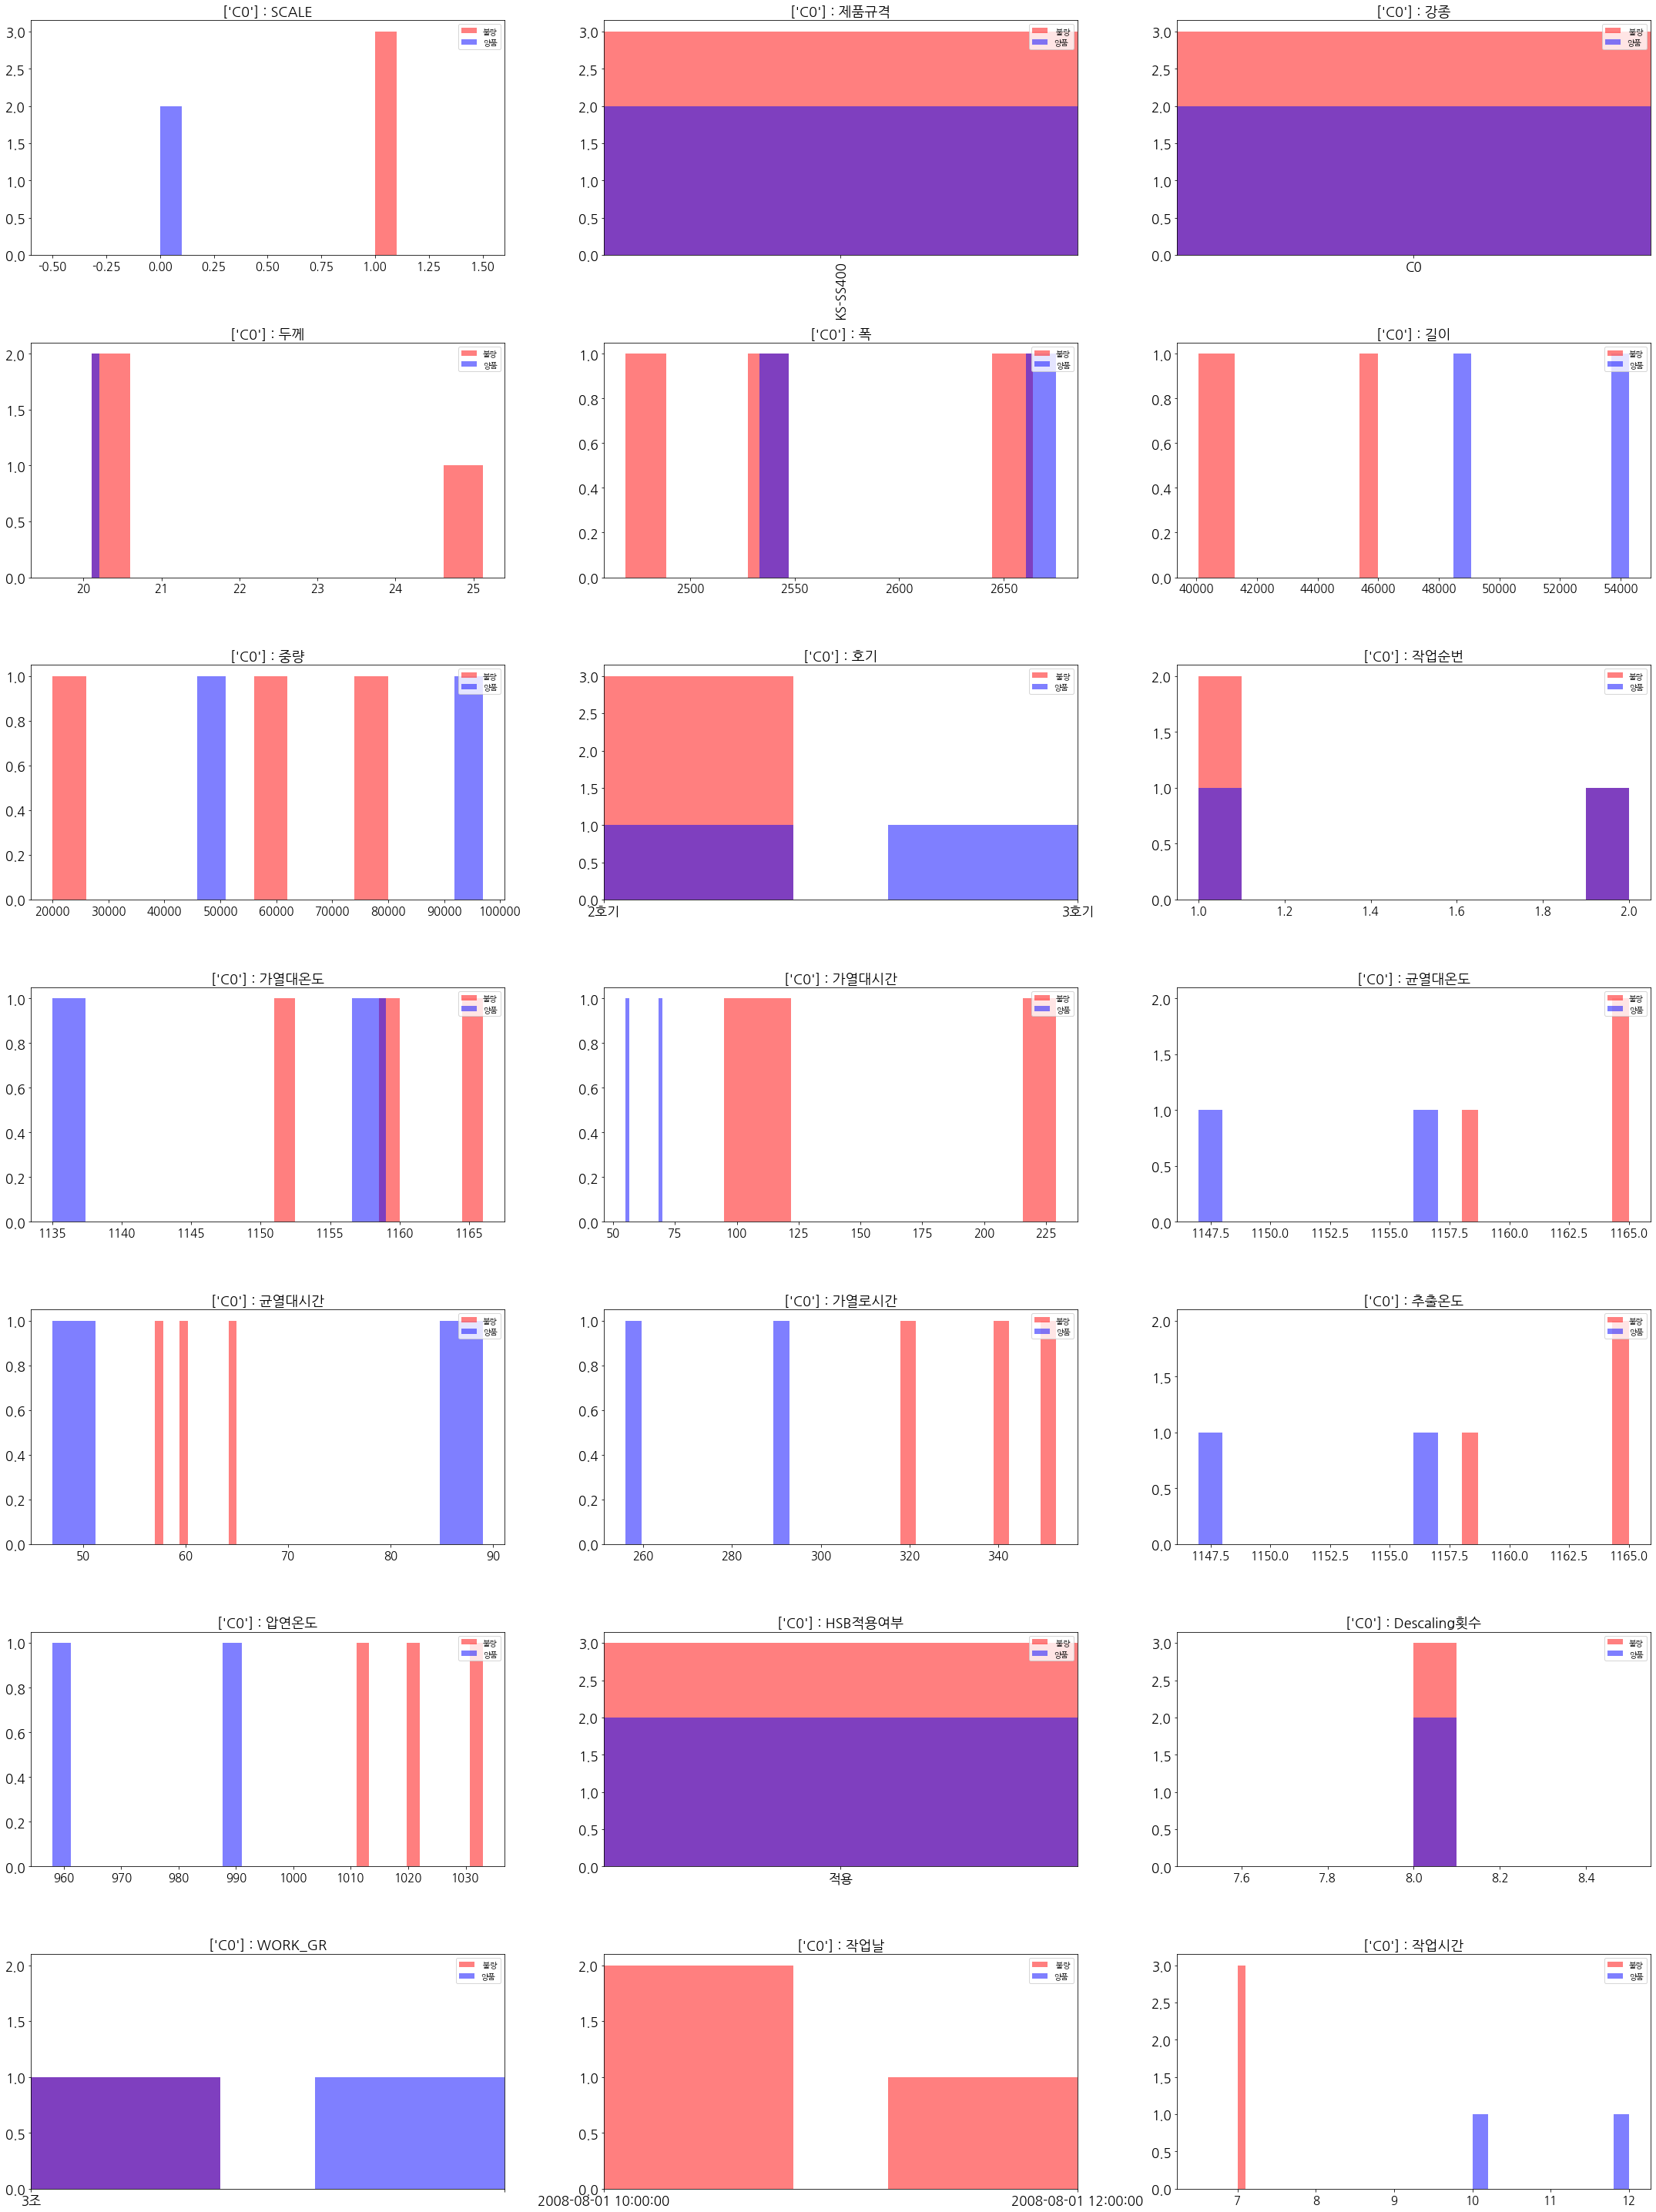

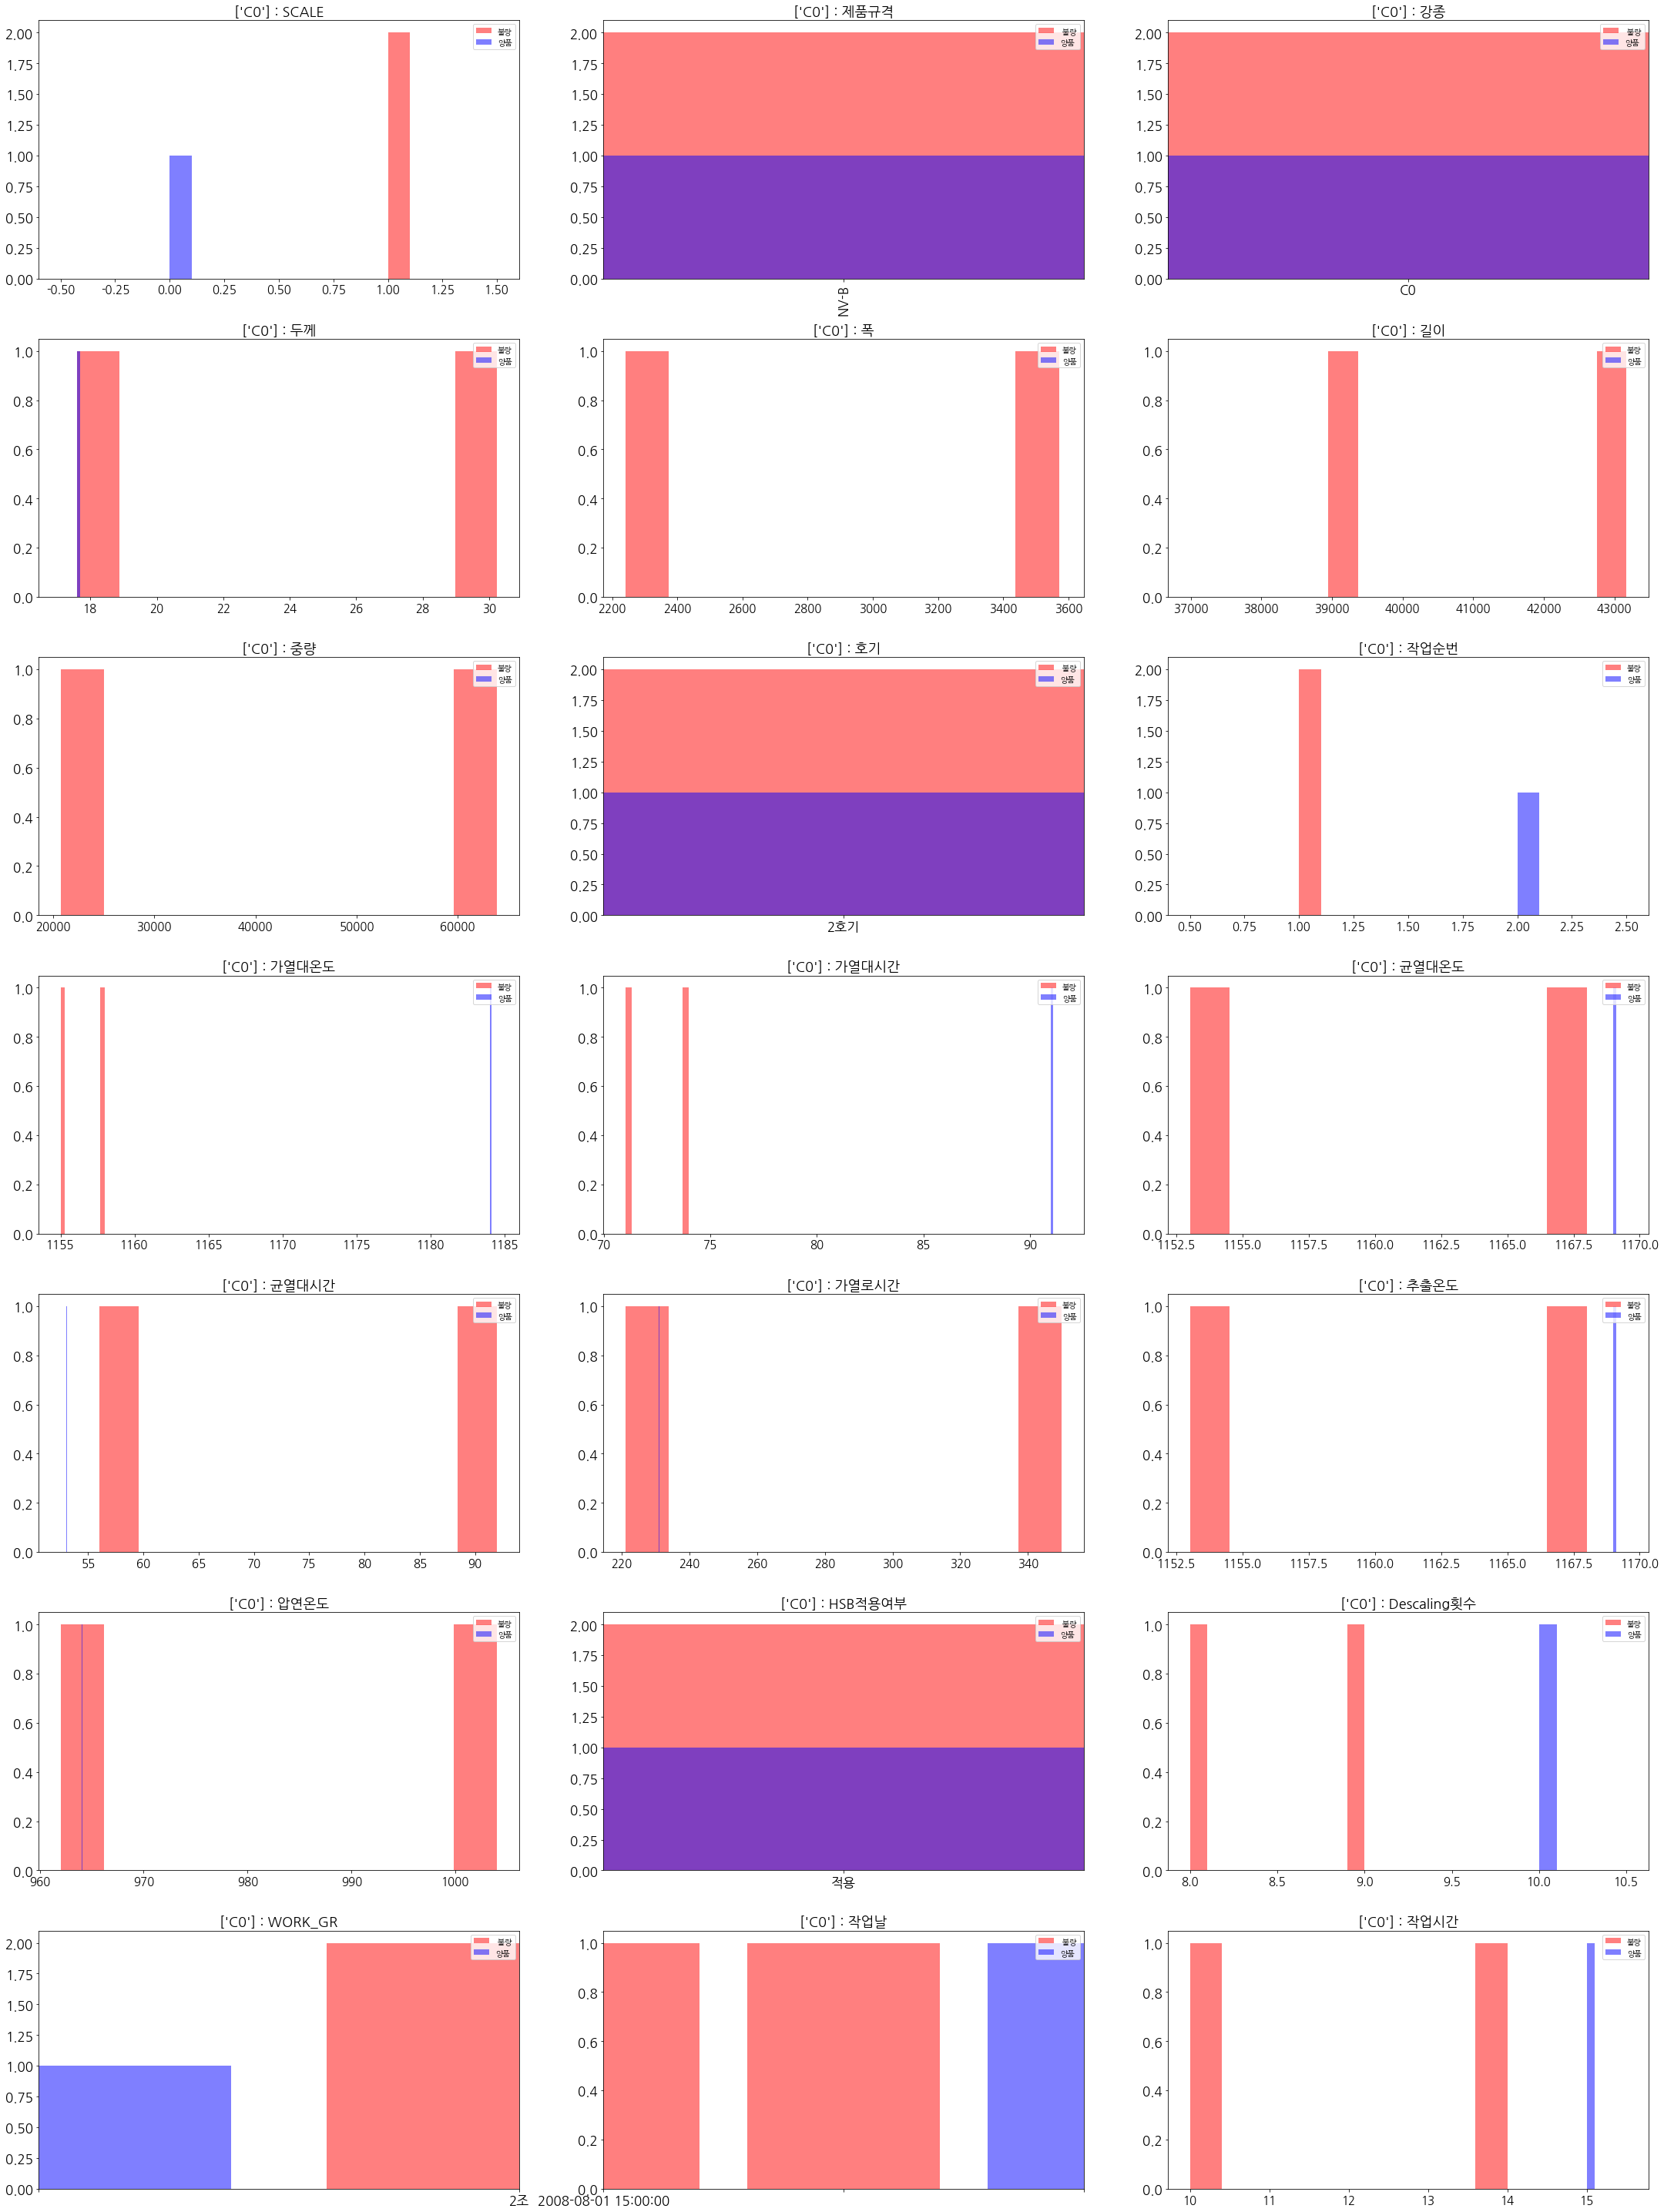

In [351]:
check(scale)

In [ ]:
### 작업조 별 생산 강종이 있나?
### 작업호별 압연 온도 가열대 온도, 가열대 시간, 균열대 온도 ,균열대 시간 확인해봐야겠다.


In [357]:
scale['강종'].unique()

array(['T1', 'T8', 'T0', 'T5', 'C0', 'C3', 'C1', 'T7', 'T3'], dtype=object)

In [359]:
scale[scale['강종']=='T1']['제품규격'].unique()

array(['AB/EH32-TM', 'GL-E32-TM', 'COMMON', 'NV-E32-TM', 'LR-EH32-TM',
       'BV-EH32-TM'], dtype=object)

In [362]:
for i in scale['강종'].unique():
    print('{}'.format(i))
    display(scale[scale['강종']==i]['제품규격'].unique())
    

T1


array(['AB/EH32-TM', 'GL-E32-TM', 'COMMON', 'NV-E32-TM', 'LR-EH32-TM',
       'BV-EH32-TM'], dtype=object)

T8


array(['NV-E36-TM', 'BV-EH36-TM', 'COMMON', 'GL-E36-TM', 'AB/EH36-TM',
       'LR-EH36-TM'], dtype=object)

T0


array(['COMMON', 'NK-KA32-TM', 'GL-A32-TM', 'NV-A32-TM', 'NV-D32-TM',
       'BV-AH32-TM'], dtype=object)

T5


array(['KS-HSB600', 'KS-HSB500', 'PILAC-BT33'], dtype=object)

C0


array(['BV-B', 'JS-SM490YB', 'LR-B', 'KR-B', 'LR-A', 'JS-SM490A',
       'KS-SM400B', 'JS-SM400B', 'AB/B', 'KS-SS400', 'NV-A', 'KR-A',
       'KS-SM400A', 'JS-SS400', 'KS-SM490B', 'JS-SM490YA', 'BV-AH32',
       'AB/AH32', 'LR-AH32', 'NV-B', 'NV-A32', 'KS-SM490A', 'NK-KA32',
       'GL-A32', 'AB/A', 'A709-36', 'KR-AH32', 'A516-60', 'NK-KA', 'GL-A',
       'BV-A', 'CCS-B', 'SA283-C', 'A283-C', 'JS-SM400A'], dtype=object)

C3


array(['V42JBN3', 'LR-AH32', 'LR-AH36', 'AB/AH32'], dtype=object)

C1


array(['JS-SS400'], dtype=object)

T7


array(['NV-D36-TM', 'LR-AH36-TM', 'GL-A36-TM', 'NK-KD36-TM', 'GL-D36-TM',
       'NV-A36-TM', 'BV-AH36-TM', 'A131-DH36TM', 'BV-AH36-TL', 'COMMON'],
      dtype=object)

T3


array(['API-2W-50T'], dtype=object)

 C1 구조용 압연 강재 C3 선체 구조용 강재, C0 구조용 압연강재 T8 선체구조용  
    
 T3 석유수송용 강재 T7 선체 구조용 강 T5 교량 건설 강재 T0 선체구조용  
 T1 선체 구조용 강재  

In [475]:
li= []
for i in scale['WORK_GR'].unique():
    a = scale[scale['WORK_GR']== i]
    print('작업조 {}의 생산 강종'.format(i))
    display(a['제품규격'].unique(),len(a['제품규격'].unique()))
    b =a.groupby(['WORK_GR','SCALE']).size().to_frame(name= 'count').reset_index().pivot_table(index= 'WORK_GR',columns ='SCALE',aggfunc ='sum', margins= True).fillna(0)
    b['ratio'] =round((b['count'][1] /(b['count'][0] +b['count'][1])) *100,3)
    di =[i,b['count']['All'].unique(),b['ratio'].unique()]
    li.append(di)
    display(b)

작업조 2조의 생산 강종


array(['AB/EH32-TM', 'BV-EH36-TM', 'COMMON', 'GL-E32-TM', 'AB/EH36-TM',
       'LR-EH36-TM', 'GL-E36-TM', 'JS-SM490YB', 'KR-B', 'KS-SM400B',
       'KS-SS400', 'V42JBN3', 'JS-SM490YA', 'AB/AH32', 'JS-SM490A',
       'LR-AH32', 'KR-A', 'JS-SS400', 'A709-36', 'BV-B', 'LR-B', 'AB/B',
       'NV-B', 'LR-A', 'A516-60', 'NV-A', 'KR-AH32', 'NV-A32',
       'LR-AH36-TM', 'GL-A36-TM', 'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33',
       'BV-AH32-TM', 'NV-D32-TM', 'NV-D36-TM', 'BV-AH36-TL', 'BV-A',
       'KS-SM490B', 'KS-SM400A', 'KS-SM490A', 'BV-AH32', 'NK-KA',
       'A283-C', 'SA283-C', 'GL-A32', 'NK-KA32'], dtype=object)

47

count          ratio
SCALE       0   1  All      
WORK_GR                     
2조        120  45  165 27.27
All       120  45  165 27.27

작업조 3조의 생산 강종


array(['NV-E36-TM', 'COMMON', 'GL-E32-TM', 'GL-E36-TM', 'AB/EH36-TM',
       'BV-EH36-TM', 'BV-B', 'JS-SM490YB', 'JS-SM490A', 'JS-SM400B',
       'LR-B', 'JS-SS400', 'JS-SM490YA', 'BV-AH32', 'KS-SM490B', 'KR-A',
       'LR-A', 'GL-A32', 'KS-SS400', 'NV-A', 'AB/B', 'NV-A32', 'NK-KA32',
       'A516-60', 'NV-D36-TM', 'GL-A32-TM', 'NV-E32-TM', 'LR-EH32-TM',
       'GL-A36-TM', 'PILAC-BT33', 'NV-D32-TM', 'NV-A36-TM', 'GL-D36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'AB/A', 'KS-SM400A', 'KS-SM490A',
       'SA283-C', 'A283-C', 'JS-SM400A', 'LR-AH32'], dtype=object)

42

count          ratio
SCALE       0   1  All      
WORK_GR                     
3조        118  54  172 31.39
All       118  54  172 31.39

작업조 1조의 생산 강종


array(['BV-EH36-TM', 'GL-E36-TM', 'COMMON', 'KS-HSB600', 'LR-EH36-TM',
       'NV-E36-TM', 'AB/EH36-TM', 'BV-B', 'LR-B', 'JS-SM490YB',
       'KS-SS400', 'KR-A', 'JS-SS400', 'KS-SM490B', 'V42JBN3', 'LR-A',
       'KS-SM400B', 'LR-AH32', 'JS-SM490A', 'KS-SM400A', 'KS-SM490A',
       'NK-KA32', 'JS-SM400B', 'BV-AH32', 'AB/A', 'NV-A', 'GL-A',
       'GL-A32', 'NK-KA32-TM', 'GL-A32-TM', 'API-2W-50T', 'GL-A36-TM',
       'BV-EH32-TM', 'NV-A32-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-D36-TM',
       'BV-AH32-TM', 'SA283-C', 'NV-A32', 'JS-SM490YA'], dtype=object)

41

count          ratio
SCALE       0   1  All      
WORK_GR                     
1조        122  67  189 35.45
All       122  67  189 35.45

작업조 4조의 생산 강종


array(['BV-EH36-TM', 'COMMON', 'GL-E36-TM', 'AB/EH36-TM', 'NV-E36-TM',
       'BV-B', 'JS-SM490YB', 'LR-A', 'AB/B', 'NV-A', 'KS-SM400A',
       'JS-SS400', 'KS-SM490B', 'KR-A', 'BV-AH32', 'LR-B', 'NV-B',
       'JS-SM490A', 'NV-A32', 'LR-AH32', 'AB/A', 'LR-AH36', 'KR-AH32',
       'NK-KA', 'AB/AH32', 'NV-E32-TM', 'KS-HSB500', 'API-2W-50T',
       'NV-A32-TM', 'NV-D32-TM', 'GL-D36-TM', 'GL-A36-TM', 'PILAC-BT33',
       'BV-AH32-TM', 'BV-AH36-TM', 'BV-AH36-TL', 'CCS-B', 'SA283-C',
       'KS-SM490A', 'A283-C', 'GL-A32', 'JS-SM400A', 'NK-KA32'],
      dtype=object)

43

count          ratio
SCALE       0   1  All      
WORK_GR                     
4조        129  65  194 33.51
All       129  65  194 33.51

In [588]:
def pro_test_gr(df, group):
    from statsmodels.stats.proportion import proportions_ztest

    df_pt =df.groupby(['WORK_GR','SCALE']).size().to_frame(name= 'count').reset_index().pivot_table(index= 'WORK_GR',columns ='SCALE',aggfunc ='sum', margins= True).fillna(0)
    df_pt['ratio'] =round((df_pt['count'][1] /(df_pt['count'][0] +df_pt['count'][1])) *100,3)
    df_pt = df_pt.reset_index()
    display(df_pt)
    df_pt1 = df_pt[df_pt['WORK_GR']==group]
    display(df_pt1)
    all1 = df_pt[df_pt['WORK_GR']=='All']
    display(all1)
    print(df_pt1['count'][1].values[0])
    print(all1['count'][1].values[0])
    count =np.array([all1['count'][1].values[0],df_pt1['count'][1].values[0]])
    nobs =np.array([all1['count']['All'].values[0],df_pt1['count']['All'].values[0]])
#     print(count)
#     print(nobs)
    stat, pval = proportions_ztest(count,nobs)
    print('stat{}'.format(stat))
    print('pval{}'.format(pval))

In [593]:
pro_test_gr(scale,'2조')

WORK_GR count           ratio
SCALE             0    1  All      
0          1조   122   67  189 35.45
1          2조   120   45  165 27.27
2          3조   118   54  172 31.39
3          4조   129   65  194 33.51
4         All   489  231  720 32.08

WORK_GR count          ratio
SCALE             0   1  All      
1          2조   120  45  165 27.27

WORK_GR count           ratio
SCALE             0    1  All      
4         All   489  231  720 32.08

45
231
stat1.2031408218835649
pval0.2289218306551788


In [550]:
li
proportion_test = pd.DataFrame(li)

proportion_test[1] = proportion_test[1].apply(lambda x : int(str(x)[1:4]))
proportion_test[2] = proportion_test[2].apply(lambda x : float(str(x)[1:6]))
ppt =pd.DataFrame(['All', proportion_test[1].sum(),round(proportion_test[2].mean(),2)])
ppt.T
proportion_test =proportion_test.append(ppt.T)
proportion_test
proportion_test.groupby(0,1,2]).size().to_frame(name ='count').reset_index([1,2])


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-550-d77796daea61>, line 10)

In [435]:

np.set_printoptions(precision=6, suppress=True)



1.89148664335447e-29

ShapiroResult(statistic=0.789898157119751, pvalue=1.89148664335447e-29)

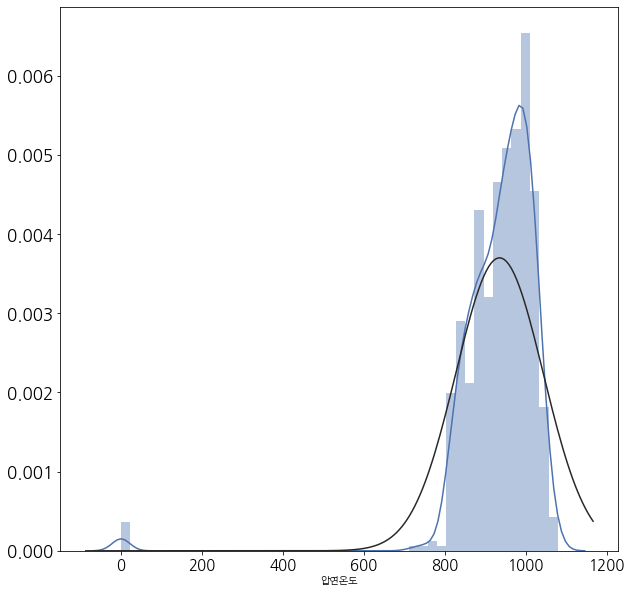

In [434]:
from scipy.stats import shapiro
from scipy import stats
np.set_printoptions(precision=6, suppress=True)
display(shapiro(scale['두께']))
sns.distplot(scale['압연온도'], fit =stats.norm)

In [436]:
scale['SCALE'].value_counts().to_frame(name =)

0    489
1    231
Name: SCALE, dtype: int64

In [ ]:
np